In [1]:
#pip install transformers
%%capture
!pip install datasets
!pip install transformers[torch]
!pip install googletrans==4.0.0-rc1
#! pip install accelerate -U
#pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyarrow as pa
import torch.nn as nn
import string


from transformers import AutoModelForSequenceClassification


from transformers import AutoModel, AutoTokenizer
from sklearn.model_selection import train_test_split
from datasets import Dataset
from transformers import TrainingArguments, Trainer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from transformers import CamembertModel, CamembertTokenizer
from typing import Dict
from googletrans import Translator





sample = pd.read_csv("https://raw.githubusercontent.com/Bratuz/Jaeger/master/detecting-french-texts-difficulty-level-2023/Data/sample_submission.csv")
train_dataset = pd.read_csv("https://raw.githubusercontent.com/Bratuz/Jaeger/master/detecting-french-texts-difficulty-level-2023/Data/training_data.csv")
test_dataset = pd.read_csv("https://raw.githubusercontent.com/Bratuz/Jaeger/master/detecting-french-texts-difficulty-level-2023/Data/unlabelled_test_data.csv")
supp = pd.read_csv("https://raw.githubusercontent.com/Bratuz/Jaeger/master/detecting-french-texts-difficulty-level-2023/Data/predictions.csv")


train_dataset.head()
train_dataset.drop('id', axis=1, inplace=True)
train_dataset = pd.concat([train_dataset, supp], ignore_index=True)
train_dataset.shape

In [3]:
train_dataset.head()

,sentence,difficulty
0,Les coûts kilométriques réels peuvent diverger...,C1
1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,Le test de niveau en français est sur le site ...,A1
3,Est-ce que ton mari est aussi de Boston?,A1
4,"Dans les écoles de commerce, dans les couloirs...",B1


In [5]:
from sklearn.model_selection import train_test_split

# Supposons que votre DataFrame a deux colonnes : 'text' pour le texte et 'difficulty' pour le niveau de difficulté
X = train_dataset['sentence']  # Les phrases
y = train_dataset['difficulty']  # Les niveaux de difficulté

# Division du dataset en 80% pour l'entraînement et 20% pour le test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# X_train, y_train seront utilisés pour l'entraînement du modèle
# X_test, y_test seront utilisés pour tester le modèle


In [10]:
y_test.head()

1318    C1
9504    C1
7222    B2
5391    C1
9166    B1
Name: difficulty, dtype: object

In [9]:
y_train.head()

5145    A1
7697    C2
3315    B1
7054    C1
1226    A2
Name: difficulty, dtype: object

In [6]:
X_train.head()

5145    Elle cherche un travail de réceptionniste dans...
7697    Il lui a été accordé, pour les compagnons, et ...
3315    Plus qu'à un changement de métier, c'est à un ...
7054    Nous sortons au restaurant, les films, le théâ...
1226                 A affronter ce monde et l'améliorer.
Name: sentence, dtype: object

In [8]:
X_test.head()

1318    Mais les chocs pétroliers plongent la France d...
9504    Le 30 ans -old prendra sa place dans la mosaïq...
7222    L'augmentation des valeurs humanistes est une ...
5391    Dans le même temps, Fabrice a été annoncé à la...
9166    Il est injuste que nous ne puissions pas le co...
Name: sentence, dtype: object

In [18]:
#pip install transformers
%%capture
!pip install datasets
!pip install transformers[torch]
!pip install googletrans==4.0.0-rc1
#! pip install accelerate -U
#pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyarrow as pa
import torch.nn as nn
import string


from transformers import AutoModelForSequenceClassification


from transformers import AutoModel, AutoTokenizer
from sklearn.model_selection import train_test_split
from datasets import Dataset
from transformers import TrainingArguments, Trainer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from transformers import CamembertModel, CamembertTokenizer
from typing import Dict
from googletrans import Translator





sample = pd.read_csv("https://raw.githubusercontent.com/Bratuz/Jaeger/master/detecting-french-texts-difficulty-level-2023/Data/sample_submission.csv")
train_dataset = pd.read_csv("https://raw.githubusercontent.com/Bratuz/Jaeger/master/detecting-french-texts-difficulty-level-2023/Data/training_data.csv")
test_dataset = pd.read_csv("https://raw.githubusercontent.com/Bratuz/Jaeger/master/detecting-french-texts-difficulty-level-2023/Data/unlabelled_test_data.csv")
supp = pd.read_csv("https://raw.githubusercontent.com/Bratuz/Jaeger/master/detecting-french-texts-difficulty-level-2023/Data/predictions.csv")


train_dataset.head()
train_dataset.drop('id', axis=1, inplace=True)
train_dataset = pd.concat([train_dataset, supp], ignore_index=True)
train_dataset.shape


from sklearn.model_selection import train_test_split

# Supposons que votre DataFrame a deux colonnes : 'text' pour le texte et 'difficulty' pour le niveau de difficulté
X = train_dataset['sentence']  # Les phrases
y = train_dataset['difficulty']  # Les niveaux de difficulté

# Division du dataset en 80% pour l'entraînement et 20% pour le test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# X_train, y_train seront utilisés pour l'entraînement du modèle
# X_test, y_test seront utilisés pour tester le modèle

In [31]:
# Création de DataFrames à partir des ensembles divisés
train_data = pd.DataFrame({'sentence': X_train, 'difficulty': y_train})
test_data = pd.DataFrame({'sentence': X_test, 'difficulty': y_test})

# Exporter les ensembles d'entraînement et de test en fichiers CSV
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)


In [20]:
test_data.head()

,sentence,difficulty
1318,Mais les chocs pétroliers plongent la France d...,C1
9504,Le 30 ans -old prendra sa place dans la mosaïq...,C1
7222,L'augmentation des valeurs humanistes est une ...,B2
5391,"Dans le même temps, Fabrice a été annoncé à la...",C1
9166,Il est injuste que nous ne puissions pas le co...,B1


In [23]:
#pip install transformers
%%capture
!pip install datasets
!pip install transformers[torch]
!pip install googletrans==4.0.0-rc1
#! pip install accelerate -U
#pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyarrow as pa
import torch.nn as nn
import string


from transformers import AutoModelForSequenceClassification


from transformers import AutoModel, AutoTokenizer
from sklearn.model_selection import train_test_split
from datasets import Dataset
from transformers import TrainingArguments, Trainer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from transformers import CamembertModel, CamembertTokenizer
from typing import Dict
from googletrans import Translator






tokenizer = AutoTokenizer.from_pretrained('camembert-base')
def process_data(row):
    text = row['sentence']
    text = str(text)
    text = ' '.join(text.split())

    encodings = tokenizer(text, padding="max_length", truncation=True, max_length=256)

    label = 0  # Valeur par défaut, peut être ajustée en fonction du niveau de difficulté par défaut

    # Définir les valeurs correspondant à chaque niveau de difficulté
    difficulty_mapping = {'A1': 0, 'A2': 1, 'B1': 2, 'B2': 3, 'C1': 4, 'C2': 5}

    # Vérifier si le niveau de difficulté est présent dans la colonne "difficulty"
    if row['difficulty'] in difficulty_mapping:
        label = difficulty_mapping[row['difficulty']]
    else:
        print(f"Label {row['difficulty']} not found in difficulty_mapping. Row: {row}")

    encodings['label'] = label
    encodings['text'] = text


    return encodings

processed_data = []

for i in range(len(train_data)):
    processed_data.append(process_data(train_data.iloc[i]))
new_df = pd.DataFrame(processed_data)

train_df, valid_df = train_test_split(new_df, test_size=0.2,random_state=50)
train_hg = Dataset(pa.Table.from_pandas(train_df))
valid_hg = Dataset(pa.Table.from_pandas(valid_df))
model = AutoModelForSequenceClassification.from_pretrained('camembert-base',num_labels=6)
from sklearn.metrics import accuracy_score

# Define a function to compute accuracy
def compute_accuracy(p):
    labels = p.label_ids
    preds = p.predictions.argmax(-1)
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc}
training_args = TrainingArguments(output_dir="./results",num_train_epochs=11,evaluation_strategy="epoch")

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_hg,  # Utilisez 'train_dataset' ici
    eval_dataset=valid_hg,
    tokenizer=tokenizer,
    compute_metrics=compute_accuracy
)

trainer.train()
trainer.evaluate()
model.save_pretrained('./model/')
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

new_model = AutoModelForSequenceClassification.from_pretrained('./model/').to(device)
new_tokenizer = AutoTokenizer.from_pretrained('camembert-base')
def get_prediction(text):
    encoding = new_tokenizer(text, return_tensors="pt", padding="max_length", truncation=True, max_length=256)
    encoding = {k: v.to(trainer.model.device) for k,v in encoding.items()}

    outputs = new_model(**encoding)

    logits = outputs.logits
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    softmax = torch.nn.Softmax(dim=-1)
    probs = softmax(logits.squeeze().cpu())
    probs = probs.detach().numpy()

    predicted_class = np.argmax(probs, axis=-1)

    # Map the predicted class to your specific difficulty levels
    difficulty_mapping = {0: 'A1', 1: 'A2', 2: 'B1', 3: 'B2', 4: 'C1', 5: 'C2'}
    predicted_difficulty = difficulty_mapping[predicted_class.item()]

    # Création du résultat sous la forme souhaitée
    result = {
        'predicted_difficulty': predicted_difficulty,
        'probability': probs[predicted_class].item()
    }

    return result

get_prediction("Vous ne pouvez pas savoir le plaisir que j'ai de recevoir cette bonne nouvelle.")
from tqdm import tqdm
# Charger le fichier de test_data
#test_data = pd.read_csv("https://raw.githubusercontent.com/Bratuz/Jaeger/master/detecting-french-texts-difficulty-level-2023/Data/unlabelled_test_data.csv")

# Initialiser une liste vide pour stocker les prédictions
predicted_difficulties = []

# Loop à travers chaque ligne dans le test_data et obtenir les prédictions
for index, row in tqdm(test_data.iterrows(), total=len(test_data), desc="Making Predictions"):
    sentence = row['sentence']
    prediction_result = get_prediction(sentence)

    # Supposons que votre prediction_result ressemble à {'predicted_difficulty': 'A1', 'probability': 0.95}
    predicted_difficulty = prediction_result['predicted_difficulty']
    predicted_difficulties.append(predicted_difficulty)


# Ajouter une nouvelle colonne 'difficulty' à votre test_dataset
test_data['difficulty'] = predicted_difficulties
test_data.head()
# Supprimer la colonne 'sentence' du test_data
test_data = test_data.drop('sentence', axis=1)
test_data.head()
# Enregistrez les prédictions dans un fichier CSV
test_data.to_csv("predictions_test.csv", index=False)
from google.colab import files

files.download("predictions_test.csv")

In [32]:
print(test_data.head())


                                               sentence difficulty
1318  Mais les chocs pétroliers plongent la France d...         C1
9504  Le 30 ans -old prendra sa place dans la mosaïq...         C1
7222  L'augmentation des valeurs humanistes est une ...         B2
5391  Dans le même temps, Fabrice a été annoncé à la...         C1
9166  Il est injuste que nous ne puissions pas le co...         B1


In [33]:
from tqdm import tqdm

for index, row in tqdm(test_data.iterrows(), total=len(test_data), desc="Making Predictions"):
    sentence = row['sentence']
    print("Phrase actuelle:", sentence)  # Pour déboguer
    prediction_result = get_prediction(sentence)
    print("Résultat de prédiction:", prediction_result)  # Pour déboguer

    predicted_difficulty = prediction_result['predicted_difficulty']
    predicted_difficulties.append(predicted_difficulty)


Making Predictions:   0%|          | 5/1920 [00:00<00:40, 47.34it/s]

Phrase actuelle: Mais les chocs pétroliers plongent la France dans la crise
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9997490048408508}
Phrase actuelle: Le 30 ans -old prendra sa place dans la mosaïque de petits écrans.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9997486472129822}
Phrase actuelle: L'augmentation des valeurs humanistes est une réalité qui se poursuit et s'affirme.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998586177825928}
Phrase actuelle: Dans le même temps, Fabrice a été annoncé à la comtesse Pietranera.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9991687536239624}
Phrase actuelle: Il est injuste que nous ne puissions pas le condamner pour la faute qu'il a commis
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9990919828414917}
Phrase actuelle: C'était le paradis, j'ai parfois fait des siestes sur le canapé, parfois sur le lit Art

Making Predictions:   1%|          | 17/1920 [00:00<00:36, 52.37it/s]

Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9998053908348083}
Phrase actuelle: La première modernité a inventé l'universalisme abstrait, qui définissait tout ce que les individus ont en commun.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9986045956611633}
Phrase actuelle: Bref, la démocratie a blanchi les temples.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998251795768738}
Phrase actuelle: La réduction du dioxyde de carbone par l'eau nécessite un approvisionnement énergétique assez élevé.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998385906219482}
Phrase actuelle: J'ai vu son nom sur la boîte aux lettres.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996746778488159}
Phrase actuelle: Si le sang dérivé révèle une anomalie, nous effectuons d'abord des analyses de confirmation.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0

Making Predictions:   1%|▏         | 28/1920 [00:00<00:38, 49.11it/s]

Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9995525479316711}
Phrase actuelle: "À ses proches
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996522665023804}
Phrase actuelle: S'il pleut, allez visiter le musée Carnavalet sur l'Histoire de Paris et finissez la journée avec une pièce de théâtre à la Comédie-Française.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9993185997009277}
Phrase actuelle: Nous apprécions qu'ils aient répondu immédiatement.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997988343238831}
Phrase actuelle: C'est maintenant ou jamais.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996163845062256}
Phrase actuelle: Le pays, qui pèse 17 % des émissions de GES, doit impérativement ratifier le protocole de Kyoto pour que celui-ci entre en vigueur.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9996249675750732}
Phras

Making Predictions:   2%|▏         | 39/1920 [00:00<00:39, 47.69it/s]

Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.996189296245575}
Phrase actuelle: Il allait devoir passer l'hiver ici dans la forêt, en attendant d'être guéri.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997044205665588}
Phrase actuelle: Car l'enfant grand n'a pas le droit de partager la nourriture des hommes.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.7756062150001526}
Phrase actuelle: Une association de promotion et de développement de l'apprentissage en ligne note que si la calculatrice a supplanté le calcul mental y compris pour des opérations basiques, et que l'utilisation d'un ordinateur relié à internet pourrait aisément remplacer une partie de notre mémoire, les opérations basiques ont été mémorisées en amont et c'est grâce à cette assimilation de connaissances basiques que l'apprenant peut utiliser la calculatrice .
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.999783933

Making Predictions:   3%|▎         | 50/1920 [00:01<00:37, 49.25it/s]

 {'predicted_difficulty': 'A2', 'probability': 0.9996768236160278}
Phrase actuelle: Nicolas se mariera pour la deuxième fois.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9983214735984802}
Phrase actuelle: Tu mangeas les petits fruits dès que tu les eus cueillis
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9993144273757935}
Phrase actuelle: On a pris les deux et on a des trucs à grignoter, car on ne sait pas combien de temps on va rester ici
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996625185012817}
Phrase actuelle: Tous les prix sont affichés, mais si nécessaire, je mets la liste des prix à côté de la caisse enregistreuse.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9995918869972229}
Phrase actuelle: Quelle est votre profession ?
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993599057197571}
Phrase actuelle: Cette anecdote doit cependant être pris

Making Predictions:   3%|▎         | 61/1920 [00:01<00:37, 49.99it/s]

Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996860027313232}
Phrase actuelle: Les guerres, l'instabilité politique sont essentiellement à l'origine des famines et des situations de pénurie qui règnent aujourd'hui dans le monde, a spécifié Bertrand Hervieu.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9998103976249695}
Phrase actuelle: Cela représente une rupture dans notre rapport au monde, parce que cela nous rend visibles.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998666048049927}
Phrase actuelle: Le Net a encouragé des visions utopistes chez d'autres.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9997853636741638}
Phrase actuelle: J'ai bien reçu ton message
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996637105941772}
Phrase actuelle: Fabrice répété, il est donc criminel de vouloir défendre la patrie?
Résultat de prédiction: {'predicted_difficu

Making Predictions:   4%|▍         | 73/1920 [00:01<00:37, 48.71it/s]

Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998693466186523}
Phrase actuelle: Ce n'était pas tant une décision stratégique qu'une nécessité.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9998292922973633}
Phrase actuelle: Ces gens vivent en autarcie totale.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998464584350586}
Phrase actuelle: En épaississant ainsi son passé, le Monde contemporain multiplie et diversifie ses héritages.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9995057582855225}
Phrase actuelle: Si l'esprit consiste à se saisir, dans sa propre opposition à soi, nulle période n'est mieux marquée par son avènement que celle du subjectivisme absolu.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9995775818824768}
Phrase actuelle: Catherine Nave-Bekhti, secrétaire général de SGEN-CFDT, juge cette nouvelle interdiction inutile.
Résultat de prédicti

Making Predictions:   4%|▍         | 83/1920 [00:01<00:37, 48.58it/s]

Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9992504715919495}
Phrase actuelle: Ils ont été regroupés autour du trône, et ils ont tous demandé les deux: "Est-il temps, ô mon roi, est-ce qu'il est temps?" Le roi des serpents est resté immobile pendant quelques minutes de plus, puis il a dit: "Il est temps!"En disant ces mots, il est descendu de son trône et s'est dirigé vers le rocher, suivi de tous les autres serpents.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996775388717651}
Phrase actuelle: Pas d'efforts violents et courts mais des efforts progressifs chaque jour.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998387098312378}
Phrase actuelle: Même si la Révolution française était déjà en cours, la capture symbolique de la forteresse de juillet, qui n'avait que 7 prisonniers à l'époque, reste l'événement clé de la révolte
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9997935

Making Predictions:   5%|▍         | 93/1920 [00:01<00:37, 48.86it/s]

Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.99985671043396}
Phrase actuelle: Joe Biden a dû renoncer mardi à sa candidate pour diriger le budget à la Maison Blanche, Neera Tanden, face à l'opposition de sénateurs-clés, premier revers pour le nouveau président démocrate qui dispose d'une très courte majorité au Congrès.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998637437820435}
Phrase actuelle: L'objectif est de permettre aux candidats du baccalauréat d'utiliser Internet pendant les tests.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9993433356285095}
Phrase actuelle: C'est ce qu'a appris Hervé Brassier qui pourrait parler pendant des heures de son chien guide, Indigo : Ce chien m'apporte beaucoup de bonheur.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997660517692566}
Phrase actuelle: Les usines sont situées à Mattighofen au nord de Salzbourg.
Résultat de prédiction: {'pre

Making Predictions:   5%|▌         | 104/1920 [00:02<00:35, 51.10it/s]

Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.6521421074867249}
Phrase actuelle: Ce sont elles qui les comptent et les mettent dans notre panier.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996927976608276}
Phrase actuelle: Plus généralement, il accompagne le bouillonnement et le désir de communication immédiate de l'adolescence.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998711347579956}
Phrase actuelle: Nous vivons dans une jolie maison avec un grand jardin. Notre quartier est calme et paisible.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9996342658996582}
Phrase actuelle: Les outils numériques contribuent à la formation des étudiants. Nous aurions préféré une référence collective à la place numérique à l'école plutôt que de découvrir que le sujet serait à nouveau relancé, sans dialogue.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.89031440019607

Making Predictions:   6%|▌         | 119/1920 [00:02<00:29, 60.44it/s]

Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996688365936279}
Phrase actuelle: C'est incroyable qu'il ait fait si beau au mariage de ta soeur l'été dernier!
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9995817542076111}
Phrase actuelle: Non.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993332028388977}
Phrase actuelle: Les producteurs doivent prendre en charge uniquement les déchets des appareils vendus à partir du 13 août 2005.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998637437820435}
Phrase actuelle: Vous avez pris une douche et vous alliez vous coucher.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9992027878761292}
Phrase actuelle: Il a longé les quais de la Saône, traversé la presqu'île, puis rejoint les quais du Rhône
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.999858021736145}
Phrase actuelle: Et, en France, beau

Making Predictions:   7%|▋         | 133/1920 [00:02<00:28, 62.92it/s]

Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9996473789215088}
Phrase actuelle: Elle a réalisé qu'elle travaillait dans l'obscurité et alluma la lampe placée sur le bureau.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9969326257705688}
Phrase actuelle: Eh bien, l'enquête est terminée, Madame.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.999663233757019}
Phrase actuelle: Et, pour que rien ne brise l'élan dont il va tâcher de la ressaisir, j'écarte tout obstacle, toute idée étrangère, j'abrite mes oreilles et mon attention contre les bruits de la chambre voisine.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9840765595436096}
Phrase actuelle: Avec les prévisions météo, on peut savoir quel temps il fera le soir, le lendemain ou dans la semaine
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9986051917076111}
Phrase actuelle: Les industriels polluent l'eau, l'a

Making Predictions:   8%|▊         | 148/1920 [00:02<00:26, 66.70it/s]

Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.999026894569397}
Phrase actuelle: "Nous avons bon espoir mais pas à court terme car il y a trop peu de lumière pour le moment", a ajouté M. Gaudon.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997907280921936}
Phrase actuelle: Il y a des marchands de poissons et c'est le départ de nombreux bateaux
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997894167900085}
Phrase actuelle: Qu'est-ce que tu penses de cette peinture ?
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.8542068600654602}
Phrase actuelle: Il y a beaucoup de troubles dans l'appartement.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993041753768921}
Phrase actuelle: Tu ne mérites pas d'en manger, dit l'autre.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996826648712158}
Phrase actuelle: Il est interdit de fumer
Résultat de 

Making Predictions:   8%|▊         | 163/1920 [00:02<00:25, 67.64it/s]

Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9992877840995789}
Phrase actuelle: Ce n'est pas facile à vivre.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.999626874923706}
Phrase actuelle: J'aime la musique classique et le rock.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993839263916016}
Phrase actuelle: J'ai deux raisons, dont chaque est suffisante seule.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9996734857559204}
Phrase actuelle: Vous joindrez à votre formulaire les pièces justificatives et documents sous format numérique.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.999800980091095}
Phrase actuelle: Et, pour finir, cet aphorisme redoutable, maître-mot de la pensée de la complexité : "Tout ce qui isole un objet détruit sa réalité même6.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9840145707130432}
Phrase actuelle: Je s

Making Predictions:   9%|▉         | 177/1920 [00:03<00:25, 67.60it/s]

Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9837656617164612}
Phrase actuelle: Les randonneurs sont rares et souvent pauvres.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998583793640137}
Phrase actuelle: Je n'ai pas de leçons à recevoir.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996737241744995}
Phrase actuelle: Pourquoi ne pas avoir donné la serviette alors que tu avais déjà les plans ?
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.999796450138092}
Phrase actuelle: L'objectif est d'offrir aux étudiants des techniques efficaces de recherche sur l'information.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9997217059135437}
Phrase actuelle: Elle est chanteuse.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9992874264717102}
Phrase actuelle: Le chat est arrivé dans le salon et il gratté le fauteuil avec ses griffes.
Résultat d

Making Predictions:  10%|█         | 192/1920 [00:03<00:25, 68.92it/s]

Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998563528060913}
Phrase actuelle: Je suis bien arrivé à Londres
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9989467263221741}
Phrase actuelle: Il fournit que les plantations forestières sont déductibles des émissions de gaz à effet de serre (GES), car les arbres poussent en pompant du dioxyde de carbone dans l'air.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998387098312378}
Phrase actuelle: Ils ont pris une pizza
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993706345558167}
Phrase actuelle: Trop souvent le tourisme est une cause de dégradation de l'environnement ou de désorganisation d'une société traditionnelle alors que le voyageur doit être à l'écoute, tolérant et s'adapter à la vie locale.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997393488883972}
Phrase actuelle: L'habileté de son plan ne consi

Making Predictions:  11%|█         | 206/1920 [00:03<00:25, 66.93it/s]

Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9998077750205994}
Phrase actuelle: Je voudrais réserver une chambre double pendant deux nuits, s'il vous plaît.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993231296539307}
Phrase actuelle: Alors dans ce texte, vous avez attendu plusieurs expressions idiomatiques.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9995799660682678}
Phrase actuelle: Ils sont heureux.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9983219504356384}
Phrase actuelle: Les coûts kilométriques réels peuvent diverger sensiblement des valeurs moyennes en fonction du moyen de transport utilisé, du taux d'occupation ou du taux de remplissage, de l'infrastructure utilisée, de la topographie des lignes, du flux de trafic, etc.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9998027682304382}
Phrase actuelle: Qu'est-ce qu'il a ton petit chat ?
Résu

Making Predictions:  12%|█▏        | 221/1920 [00:03<00:25, 67.79it/s]

Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9995731711387634}
Phrase actuelle: Pouvez-vous vous expliquer à nouveau, s'il vous plaît?
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9987786412239075}
Phrase actuelle: Les chiffres le prouvent: en 2000, les filles ne représentaient que 43, 7% des effectifs en S (pour 82, 5% dans les séries littéraires), 22, 5% dans les écoles d'ingénieurs, et 14% à Polytechnique.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9929220080375671}
Phrase actuelle: Des chorales chantent sur le parvis rappelant que cette fête est à l'origine une fête religieuse
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.999816358089447}
Phrase actuelle: À quelques semaines d'intervalle, Jean-Claude Kella, alias le diable, la figure mythique de la connexion française, et Antoine Cossu, connu sous le nom d'anguille, comme de vol et d'évasion, qui sont tombés ensemble dans le

Making Predictions:  12%|█▏        | 228/1920 [00:03<00:24, 67.69it/s]

Phrase actuelle: Je veux prendre rendez-vous pour mon dos.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.999683141708374}
Phrase actuelle: Avez-vous des projets pour la nouvelle année?
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.5381781458854675}
Phrase actuelle: Une fois le seuil d'entrée franchi, vous pouvez voir, dans un coin, un tas de chaussures sombres, puis, comme un arc-en-ciel, une rangée de téléphones mobiles.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998703002929688}
Phrase actuelle: Les professeurs d'anglais préparent des leçons sur le sujet et participent à sa diffusion avec les jeunes
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9997730851173401}
Phrase actuelle: Cet essor est lié à la mise en place de mesures fiscales favorables aux parents.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9998131394386292}
Phrase actuelle: Il est dramati

Making Predictions:  13%|█▎        | 243/1920 [00:04<00:24, 68.72it/s]

Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998652935028076}
Phrase actuelle: Pourquoi il ne parle pas ?
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993390440940857}
Phrase actuelle: Il a un appartement
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9995617270469666}
Phrase actuelle: En raison de la progression démographique et du développement des classes moyennes dans le monde, les systèmes éducatifs devront s'entraîner, d'ici 2050, autant d'étudiants que de l'histoire de l'humanité unie.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9965006113052368}
Phrase actuelle: L'élastique s'est distendu.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.998342752456665}
Phrase actuelle: Attendant pour les développements à long terme, Pierre Bréchon, professeur à l'IEP de Grenoble, voit le visage d'une société d'individualisation, qu'il distingue d'une société d'in

Making Predictions:  13%|█▎        | 258/1920 [00:04<00:23, 69.87it/s]

Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9992806315422058}
Phrase actuelle: Toute la journée, nous sommes inondés d'informations de toute part : messages personnels, professionnels, publicitaires, fils d'infos en continu.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998558759689331}
Phrase actuelle: On dirait d'une caravane immense, d'une espèce de fantasia nautique, somptueusement bariolée, évoluant, aux derniers feux du soleil, sur la tranquille splendeur des eaux.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9995707869529724}
Phrase actuelle: Figurez-vous un Turc allant la nuit chez Paul Niquet!
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998494386672974}
Phrase actuelle: J'aimerais que tu fermes la fenêtre avant de partir.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9854017496109009}
Phrase actuelle: C'est une question de vie ou de mort, ins

Making Predictions:  14%|█▍        | 272/1920 [00:04<00:24, 67.79it/s]

Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998248219490051}
Phrase actuelle: J'aimerais poser une question.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993723034858704}
Phrase actuelle: Je suis fatiguée et préfère prendre le métro pour aller à l'Île de la Cité
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9978984594345093}
Phrase actuelle: Le chef du gouvernement prévoit des élections.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997910857200623}
Phrase actuelle: Tapez votre message sur les touches de votre téléphone
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9991957545280457}
Phrase actuelle: Ce paysan pleurait et prétendait qu'on lui avait tout pris ; Fabrice lui donna un écu, et il trouva de l'avoine.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998654127120972}
Phrase actuelle: Du fait de la progression démographiq

Making Predictions:  15%|█▍        | 286/1920 [00:04<00:24, 67.90it/s]

Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.966640293598175}
Phrase actuelle: Ainsi, en Amérique latine, en Asie de l'Est et du Sud-Est, et même dans le sous-continent indien, de grands progrès sont réalisés depuis trente ans.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.999810516834259}
Phrase actuelle: C'est pour moi une grande déception de ne pas pouvoir vous accueillir à Zurich
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997121691703796}
Phrase actuelle: L'artiste peignit un paysage qu'il eut vu
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9759851694107056}
Phrase actuelle: En effet, selon le philosophe Michel Serres, elle a atteint l'homme moderne dans ses facultés.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.7511181235313416}
Phrase actuelle: Vous devez retourner au bureau pour la réunion avec le directeur de la société NYSOL.
Résultat de préd

Making Predictions:  16%|█▌        | 301/1920 [00:05<00:23, 68.82it/s]

Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9116629958152771}
Phrase actuelle: Bien qu'ils représentent 20% de la population, les retraités représentent déjà 30% des électeurs.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998550415039062}
Phrase actuelle: Le nombre insuffisant de professeurs formés est également un frein pour beaucoup d'adversaires de cette mesure, qui la jugent inapplicable.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9985479712486267}
Phrase actuelle: Les incidents sont disposés et gradués vers le point culminant et l'effet de la fin, qui est un événement capital et décisif, satisfaisant toutes les curiosités éveillées au début, mettant une barrière à l'intérêt, et terminant si complètement l'histoire racontée qu'on ne désire plus savoir ce que deviendront, le lendemain, les personnages les plus attachants.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.999875

Making Predictions:  16%|█▋        | 316/1920 [00:05<00:23, 68.83it/s]

Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9994301199913025}
Phrase actuelle: Le Pacha aide un serpent (le roi des serpents) parce que l'un des commandements du Coran est de montrer à l'hospitalité ses hôtes.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.999774158000946}
Phrase actuelle: D'après Marx, les Hommes qui font du travail une contrainte sont ceux qui produisent les objets du désir des Hommes
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9995005130767822}
Phrase actuelle: Je parle beaucoup.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.999360978603363}
Phrase actuelle: Le nombre de mal-nourris dans les pays les moins avancés a ainsi doublé au cours des trente dernières années, passant de 116 à 235 millions.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9997518658638}
Phrase actuelle: L'oiseau s'approcha de lui à tout petits pas.
Résultat de prédi

Making Predictions:  17%|█▋        | 331/1920 [00:05<00:22, 69.54it/s]

Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9992936849594116}
Phrase actuelle: Et les trous s'enfoncent dans ces alluviums d'espace, infundibuliformes, trous rouges, par lesquels filtra une lumière de lanterne légère.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9995019435882568}
Phrase actuelle: Un automobiliste a été arrêté pour avoir brûlé un feu rouge.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.999816358089447}
Phrase actuelle: Le chien n'est pas le seul à apprendre !
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.999642014503479}
Phrase actuelle: OK, alors nous respectons-nous le samedi prochain?
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9989225268363953}
Phrase actuelle: Samedi dernier, j'ai passé la journée à Paris avec mon frère
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996761083602905}
Phrase actuelle: Plus qu

Making Predictions:  18%|█▊        | 345/1920 [00:05<00:23, 66.60it/s]

Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9997987151145935}
Phrase actuelle: Serveur: une table pour quatre, n'est-ce pas?
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9979896545410156}
Phrase actuelle: Aux États-Unis, les soldats risquent leur vie pour sauver des machines simples.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998552799224854}
Phrase actuelle: Les articulations sont en haut la hanche, au milieu le genou en en bas la cheville
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.999821126461029}
Phrase actuelle: Des enfants en choeur : Des petits pois avec de la salade !
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996174573898315}
Phrase actuelle: Malgré cela, des protestataires continuent à descendre dans les rues pour demander le départ des généraux putschistes et la libération des centaines de détenus emprisonnés ces dernières semaines.
R

Making Predictions:  19%|█▊        | 359/1920 [00:05<00:23, 67.64it/s]

Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9994590878486633}
Phrase actuelle: S'il fait beau, l'après-midi vous pouvez aller au jardin du Luxembourg et, le soir vous pouvez faire un tour en bateau jusqu'à la Tour Eiffel.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993448853492737}
Phrase actuelle: Il n'est vraiment pas facile de transmettre votre langue lorsque vous n'êtes pas dans votre pays d'origine!
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9993786811828613}
Phrase actuelle: Instinctivement je regardai ma montre : deux heures du matin.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.822525680065155}
Phrase actuelle: Sans y penser, j'ai fait des erreurs !
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9998039603233337}
Phrase actuelle: Le résultat de ces deux études démontrent que chez les personnes par ailleurs en bonne santé et menant un train de

Making Predictions:  19%|█▉        | 374/1920 [00:06<00:22, 68.91it/s]

Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998615980148315}
Phrase actuelle: C'est exactement l'une des meilleurs methodes d'apprentissage d'une langue etrangere.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9980958104133606}
Phrase actuelle: Là, tout le monde parle anglais
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993588328361511}
Phrase actuelle: L'influence du microbiote sur notre comportement a pu être observée.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9997860789299011}
Phrase actuelle: Mais, tout comme l'uploading du cerveau peut être considéré comme un archétype nous permettant de penser l'identité numérique, les rêveries de la nanotechnologie moléculaire apparaissent comme l'horizon lointain des recherches d'aujourd'hui.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9995418787002563}
Phrase actuelle: Certains partenaires ne demandent pa

Making Predictions:  20%|██        | 389/1920 [00:06<00:22, 68.95it/s]

Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.999521017074585}
Phrase actuelle: Il s'agit vraiment de l'introduction de l'informatique dans la culture générale.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9986345171928406}
Phrase actuelle: Le soir, je me couche tôt parce que je dois toujours être en bonne forme.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.999639630317688}
Phrase actuelle: L'auteur souhaite encourager les femmes à s'impliquer en mathématiques.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9996073842048645}
Phrase actuelle: Savoir exactement quelle sera la météo, quelles seront les soirées où vous devrez être habillée
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9984874725341797}
Phrase actuelle: En seconde.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9957493543624878}
Phrase actuelle: Il y a deux possibilités:

Making Predictions:  21%|██        | 404/1920 [00:06<00:22, 68.82it/s]

Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.999861478805542}
Phrase actuelle: Chaque week-end, ils sont allés ensemble en randonnée dans les Alpes.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9729814529418945}
Phrase actuelle: Plus que jamais, ils auront le rôle essentiel de trouver de vrais talents parmi les dizaines de milliers de prétendants qui, grâce au livre numérique, rêvent déjà d'être publiés facilement.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998202919960022}
Phrase actuelle: J'ai mis tout ce que j'avais dans ce projet.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996687173843384}
Phrase actuelle: C'est une fête très joyeuse où tout le monde met des vêtements pleins de couleurs.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996860027313232}
Phrase actuelle: La ville entière s'est illuminée autour du marché de Noël qui enchante les pas

Making Predictions:  22%|██▏       | 419/1920 [00:06<00:22, 67.73it/s]

Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9991399049758911}
Phrase actuelle: Il l'avait tenue là sévèrement enfermée, cloîtrée, ignorée et ignorante des choses humaines.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9998094439506531}
Phrase actuelle: Je ne suis qu'un bon soldat timide.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9998102784156799}
Phrase actuelle: En les mélangeant, on peut former d'autres couleurs. Le vert par exemple, est la couleur de l'herbe et des feuilles des arbres.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997836947441101}
Phrase actuelle: Je me suis vite donné, par cette conduite, une grande réputation de légèreté, de moquerie, de méchanceté.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.992805540561676}
Phrase actuelle: S'il fait beau, l'après-midi vous pouvez aller au jardin du Luxembourg.
Résultat de prédiction: {'predi

Making Predictions:  23%|██▎       | 433/1920 [00:06<00:21, 67.79it/s]

Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9987443685531616}
Phrase actuelle: L'entreprise qui gère est l'anglais majoritaire.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.999803364276886}
Phrase actuelle: Ils sont si jolis que nous avons décidé d'en apprendre un par cœur.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9995725750923157}
Phrase actuelle: Leur vue parut frapper si vivement l'adjudant sousofficier, qu'aussitôt il changea de pensée, et se mit à interroger aussi le domestique.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9998038411140442}
Phrase actuelle: Les Cyanobactéries se distinguent des Bactéries par la présence de chlorophylle A et de pigments accessoires hydrosolubles, les phycobilines rouge et bleue.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9997479319572449}
Phrase actuelle: C'est une activité en plein développement car aujourd'

Making Predictions:  23%|██▎       | 448/1920 [00:07<00:21, 69.19it/s]

Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998539686203003}
Phrase actuelle: Mon mari est éditeur.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993597865104675}
Phrase actuelle: Des crèches vivantes y sont organisées et la paroisse se prépare pour la masse de minuit
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9870473146438599}
Phrase actuelle: Si cette actrice avait accepté le rôle, elle aurait été formidable.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998722076416016}
Phrase actuelle: Le démon voulait trouver une cachette pour ne plus revoir la méchante femme.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9998182654380798}
Phrase actuelle: Nous sommes en 1915, à Vitebsk, la ville natale de Marc Chagall.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998351335525513}
Phrase actuelle: Les trafiquants se rabattent donc sur

Making Predictions:  24%|██▍       | 463/1920 [00:07<00:20, 69.67it/s]

Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998650550842285}
Phrase actuelle: Par crainte des représailles, les contestataires ont été moins nombreux mardi dans les rues.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.999846339225769}
Phrase actuelle: Tu descends l'escalier et tu tournes à gauche.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9994057416915894}
Phrase actuelle: Et fringants.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998481273651123}
Phrase actuelle: Les spécialistes de la violence adolescente rappellent qu'il est dangereux de les considérer comme une armée menaçante.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.991081714630127}
Phrase actuelle: Les enfants aiment faire du vélo avec leur grand-père après l'école.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993818998336792}
Phrase actuelle: Le fonctionnement

Making Predictions:  25%|██▍       | 478/1920 [00:07<00:20, 69.87it/s]

Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997814297676086}
Phrase actuelle: Victoire en 1906: la loi du 13 juillet instaure une trêve dominicale obligatoire.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9995504021644592}
Phrase actuelle: Avec la peinture, s'appuie sur le pot.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9969655871391296}
Phrase actuelle: Non bien sûr que non.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9995982050895691}
Phrase actuelle: Mes parents disent que l'île est très jolie: il y a de très belles plages, nous pourrons nager.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9995564818382263}
Phrase actuelle: Il y a belle lurette que les entreprises françaises se sont délocalisées pour optimiser leurs coûts et s'ouvrir de nouveaux marchés
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9995883107185364}
Phra

Making Predictions:  26%|██▌       | 492/1920 [00:07<00:21, 67.87it/s]

Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.999666690826416}
Phrase actuelle: "Me voici." Quand la femme a vu le berger, elle a cessé de pleurer et a dit: "Eh bien, où avez-vous été tout l'hiver?"
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9985002279281616}
Phrase actuelle: Je voudrais apparaître dans un film mais je n'ai pas encore eu l'occasion de l'être.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997326731681824}
Phrase actuelle: C'est une question que se posent avec insistance les autorités politiques et sanitaires ces dernières semaines.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.999864935874939}
Phrase actuelle: Un hôte désigne soit la personne qui reçoit un invité soit l'invité qui est reçu, accueilli.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9998077750205994}
Phrase actuelle: Serveur : une table pour quatre, n'est-ce pas ?
Résultat d

Making Predictions:  26%|██▋       | 506/1920 [00:08<00:20, 67.41it/s]

Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.999610960483551}
Phrase actuelle: Donner leur chance aux documentaires, les faire exister en salle, telle est la mission en temps normal de l'association Documentaire sur grand écran, créée en 1991.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.6718114018440247}
Phrase actuelle: Ce n'est pas juste.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9992958307266235}
Phrase actuelle: Serveur: Je vais leur demander de me calmer, afin que vous puissiez profiter de votre repas calme.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996867179870605}
Phrase actuelle: Quelles hanches de bowling, quelles curiosités rugueuses n'étaient pas l'objet et la victime!
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9998056292533875}
Phrase actuelle: L'hospitalité est l'action de recevoir une personne à la maison, pour l'accueillir de ma

Making Predictions:  27%|██▋       | 521/1920 [00:08<00:20, 68.07it/s]

Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9997994303703308}
Phrase actuelle: Tu as bien travaillé.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9948903322219849}
Phrase actuelle: Tu pourrais ranger ta chambre, ça t'aiderait à les retrouver !
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997996687889099}
Phrase actuelle: Ces tanières se fondent dans la nature pour être quasiment invisibles.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998637437820435}
Phrase actuelle: En parallèle, les romans et les films de science-fiction ont présenté des robots, tels que Transformers par exemple, aux pouvoirs surhumains.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9915593266487122}
Phrase actuelle: C'est la couleur de nombreux fruits et légumes, comme les tomates, les fraises ou les cerises.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.

Making Predictions:  28%|██▊       | 528/1920 [00:08<00:20, 66.43it/s]

Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9997273087501526}
Phrase actuelle: Tu manges trop.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993686079978943}
Phrase actuelle: Il doit se dépêcher de ne pas être en retard à l'école.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.999685525894165}
Phrase actuelle: Il y a une ruée vers: "Devenez un peu plus indépendant, moins dépendant des magasins, des importations, de grandes zones", donc une sorte de retour à l'artisanat, un peu de nos ancêtres, nos parents, de nos grands-parents.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9992489218711853}
Phrase actuelle: Avec la lutte contre le séparatisme, une stratégie d'entrave et répressive contre l'islam radical est mise en oeuvre.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9998082518577576}
Phrase actuelle: Si l'épicerie de quartier avait été ouverte en ce jou

Making Predictions:  28%|██▊       | 543/1920 [00:08<00:20, 67.68it/s]

Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996809959411621}
Phrase actuelle: Par ailleurs, le concept d'echelle architecturologique constitue un outil d'investigation pour questionner la representation architecturale du point de vue de la conception.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9966375827789307}
Phrase actuelle: Où  habites-tu ?
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993497729301453}
Phrase actuelle: Le bac en poche, le premier d'entre eux choisit d'en faire son métier.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997952580451965}
Phrase actuelle: Mais, tout comme le téléchargement du cerveau peut être considéré comme un archétype nous permettant de penser à l'identité numérique, les rêveries de la nanotechnologie moléculaire apparaissent comme l'horizon lointain de la recherche d'aujourd'hui.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'pro

Making Predictions:  29%|██▉       | 558/1920 [00:08<00:20, 66.70it/s]

Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996895790100098}
Phrase actuelle: L'impatience me dévorait : à tous les instants je consultais ma montre.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.999752938747406}
Phrase actuelle: À ces deux types de raisons, facilement identifiables à travers la littérature, qui poussent les entreprises à réfléchir à l'évaluation des connaissances, sont associées à d'autres raisons plus difficiles caractérisant qui semblent inspirées par le désir de transformer l'organisation
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9995668530464172}
Phrase actuelle: D'un autre côté, l'équipe sportive comme le football ou le basket-ball, je n'aime pas du tout!
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9546326398849487}
Phrase actuelle: Je marche sur le chien de mon voisin qui est en vacances.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probabi

Making Predictions:  30%|██▉       | 573/1920 [00:09<00:19, 67.75it/s]

Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9995526671409607}
Phrase actuelle: Après plusieurs heures de marche, j'ai atteint l'énorme bloc de pierre qui transporte la petite ville dominée par la grande église.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.8589513301849365}
Phrase actuelle: Ils boivent de l'eau avec des glaçons.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9985467791557312}
Phrase actuelle: Si vous avez trouvé la vidéo amusante, pensez à aimer notre chaîne YouTube et notre page Facebook
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9994681477546692}
Phrase actuelle: Pour avoir plus d'informations, vous pouvez venir voir le médecin de l'école tous les jours au bureau 4B au 4ème étage.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9995934367179871}
Phrase actuelle: Elle est très jolie.
Résultat de prédiction: {'predicted_difficulty': 'B1', 

Making Predictions:  31%|███       | 588/1920 [00:09<00:19, 69.62it/s]

Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9968979358673096}
Phrase actuelle: Les gourmets, adeptes de la bistonomie, sont souvent offerts dans un ensemble accompagné de fruits secs, même de la confiture; un mélange salé sucré qui convient parfaitement aux apéritifs du digne si cher aux bourgeons de goût hexagonal.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9994733929634094}
Phrase actuelle: Par exemple, le matin on plante des arbres pour repeupler une forêt et l'après-midi chacun reste libre de visiter ce qu'il souhaite ou de se reposer sur une plage.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9721569418907166}
Phrase actuelle: Alors le directeur de l'information, raconte : "Dans l'équipe de direction, j'étais le seul à défendre sa candidature.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997919201850891}
Phrase actuelle: Cette réponse me bouleversa.
Résultat de prédictio

Making Predictions:  31%|███▏      | 603/1920 [00:09<00:18, 70.01it/s]

Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997362494468689}
Phrase actuelle: Il était perçu comme un moyen de transport enfantin.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9784958958625793}
Phrase actuelle: J'adore l'odeur du napalm au petit matin.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998422861099243}
Phrase actuelle: La dynamique de la vie de ces couples, ponctuée par des crises et des étapes successives similaires à celles de n'importe quel couple, a sa propre logique.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9994770884513855}
Phrase actuelle: Mon frère Patrice est plus jeune que moi, il va à l'école des petits.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9990917444229126}
Phrase actuelle: Il ne m'adresse plus la parole et je ne lui parle pas non plus.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.99958342

Making Predictions:  32%|███▏      | 618/1920 [00:09<00:18, 68.60it/s]

Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9998031258583069}
Phrase actuelle: L'échange, c'est-à-dire l'interaction verbale, se présente comme une co-construction constitutive de la dynamique du groupe; c'est en tenant compte des interlocuteurs et de la façon dont ils se positionnent vis-à-vis des autres, selon leLes objets et les défis des interactions, que nous prévoyons d'analyser à la fois la variation des utilisations impliquaient l'hétérogénéité constitutive de dire, dans cet espace.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9995532631874084}
Phrase actuelle: Le site de Time magazine en a parlé.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9875911474227905}
Phrase actuelle: Cette mort de Dieu donne toute sa signification à la souf-france humaine, et la souffrance humaine est la douleur infinie, est la preuve de l'infinité divine, qui unit les contraires entre lesquels l'esprit humain est divisé.

Making Predictions:  33%|███▎      | 633/1920 [00:09<00:18, 69.61it/s]

Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996616840362549}
Phrase actuelle: Quand je rentre, je demande à mes parents si je peux t'appeler pour avoir de tes nouvelles.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996854066848755}
Phrase actuelle: La presse a annoncé que le gouvernement proposera bientôt des mesures pour réduire la précarité des étudiants.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.999855637550354}
Phrase actuelle: Elle n'aime pas les gens que je fréquente.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9995778203010559}
Phrase actuelle: Vous êtes américain et elle est l'anglais.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.999333918094635}
Phrase actuelle: Au sommet de la tour Eiffel, il y a des antennes qui font des programmes de radio et de télévision
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9998070

Making Predictions:  34%|███▍      | 648/1920 [00:10<00:18, 69.63it/s]

Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.999582827091217}
Phrase actuelle: Je perdais mon temps: je n'ai rien fait d'utile à la société moderne.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997876286506653}
Phrase actuelle: La chronologie antique ne prend sens que sur un large pourtour de la Méditerranée, de même que ce découpage spatial n'est pertinent comme entité géographique que durant cette période pendant laquelle la mer intérieure n'est pas vécue comme une limite.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9995680451393127}
Phrase actuelle: Merci, faites un bon voyage.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9988666772842407}
Phrase actuelle: En plus, il y avait le grand parasol qui prenait toute la place
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996820688247681}
Phrase actuelle: J'ai entendu dire que le maire souhaitait supprimer

Making Predictions:  35%|███▍      | 663/1920 [00:10<00:17, 70.15it/s]

Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9995654225349426}
Phrase actuelle: Il avait une consolation.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.8468676209449768}
Phrase actuelle: C'est pratique, je veux dire, le moment de la convalescence, vous portez un masque, donc de toute façon en règle générale, il ne peut pas être vu
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9998028874397278}
Phrase actuelle: Je n'ai pas vraiment d'appétit le matin, même si je sais que c'est le repas le plus important de la journée
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996671676635742}
Phrase actuelle: Certaines professions disparaîtront, mais d'autres apparaissent.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9997813105583191}
Phrase actuelle: L'ordinateur peut également répondre aux interruptions qui lui permettent d'exécuter des programmes de réponse spécifiqu

Making Predictions:  35%|███▌      | 678/1920 [00:10<00:18, 68.80it/s]

Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9995926022529602}
Phrase actuelle: Le chien est le meilleur ami de l'homme.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9991967082023621}
Phrase actuelle: Cette année, dans sa chambre, il y a une terrasse en face de la mer, une grande salle de bains, la télévision et l'air conditionné
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996781349182129}
Phrase actuelle: Et si boire chaud donne chaud, c'est un mal pour un bien car la température élevée du liquide augmente la température interne du corps et stimule ainsi la transpiration.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9998206496238708}
Phrase actuelle: Elle fait ses devoirs puis prépare le dîner et enfin, elle regarde un film avant de se coucher
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9663614630699158}
Phrase actuelle: La promenade éducative et in

Making Predictions:  36%|███▌      | 692/1920 [00:10<00:18, 67.05it/s]

Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993564486503601}
Phrase actuelle: Où irons-nous en vacances l'année prochaine ?
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9989688396453857}
Phrase actuelle: Le jour est long pour lui
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996635913848877}
Phrase actuelle: Et celui-là, ce fut Augustin Meaulnes, que les autres élèves appelèrent bientôt le grand Meaulnes.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9897492527961731}
Phrase actuelle: Et sans doute encore, le romantisme allemand dans lequel ces mouvements de l'esprit vont trouver comme une fluide cristalli- sation ne se présente pas au premier abord comme conscience malheureuse, ainsi que le fait le romantisme français.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.999544084072113}
Phrase actuelle: Pourriez-vous m'accompagner
Résultat de prédiction: {'p

Making Predictions:  37%|███▋      | 706/1920 [00:10<00:17, 67.93it/s]

Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9997996687889099}
Phrase actuelle: Ils ont deux enfants : un fils qui s'appelle André et une fille qui est très gentille
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996583461761475}
Phrase actuelle: Avec son allure, il donne l'impression d'être le maître du monde.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996728897094727}
Phrase actuelle: Qu'est-ce que votre petit chat a?
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993005990982056}
Phrase actuelle: Je m'appelle Laurent et je vis à Paris avec mes parents, ma sœur aînée et mon frère.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993829727172852}
Phrase actuelle: Une huitième édition dominée par le duel au sommet avec Alex Thomson, une course poursuite menée par Armel depuis le 23 novembre dernier, quarante-sept jours de haute tension qui se terminent 

Making Predictions:  38%|███▊      | 720/1920 [00:11<00:18, 66.65it/s]

Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9992406368255615}
Phrase actuelle: Dans le bureau, il y a un vélo d'appartement, des haltères et un stepper
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997108578681946}
Phrase actuelle: À Marrakech en 2001, 15 pays avaient décidé de créer un fonds spécial sur le changement climatique.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9997484087944031}
Phrase actuelle: Nous avions l'intention d'appeler ce journal Changer de vie, révèle sa fondatrice.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9904029369354248}
Phrase actuelle: Au cours de l'année scolaire 2001-2002, la violence physique de nature sexuelle a représenté 1, 13% des actes de violence identifiés par le logiciel d'éducation national.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9997888207435608}
Phrase actuelle: Il avait adopté le signe de la croix ;

Making Predictions:  38%|███▊      | 735/1920 [00:11<00:17, 68.57it/s]

Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9997342228889465}
Phrase actuelle: Suivant leur position sociale différente, ils avaient des habits, des redingotes, des vestes, des habitsvestes : - bons habits, entourés de toute la considération d'une famille, et qui ne sortaient de l'armoire que pour les solennités ; redingotes à grandes basques flottant au vent, à collet cylindrique, à poches larges comme des sacs ; vestes de gros drap, qui accompagnaient ordinairement quelque casquette cerclée de cuivre à sa visière ; habits-vestes très courts, ayant dans le dos deux boutons rapprochés comme une paire d'yeux, et dont les pans semblaient avoir été coupés à même un seul bloc, par la hache du charpentier.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.999565064907074}
Phrase actuelle: Je me suis dit que ce sont les produits que nous utilisons actuellement ne sont pas d'origine naturelle, clairement pas
Résultat de prédiction: {'predicted

Making Predictions:  39%|███▉      | 749/1920 [00:11<00:17, 68.02it/s]

Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9992806315422058}
Phrase actuelle: Ma mère viendra en France.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997970461845398}
Phrase actuelle: À la fin de son apprentissage, Julien est parti pour la France.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9995755553245544}
Phrase actuelle: Pour conjurer les deux mois de vacances, ils achètent donc leur potion dans les librairies pour un investissement moyen de 7 euros.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9995549321174622}
Phrase actuelle: Cette notion est très importante.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.99982750415802}
Phrase actuelle: Ce livre, tu me le conseilles ou tu me le déconseilles?
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997919201850891}
Phrase actuelle: Enfin, vous vous connecrez avec votre certifica

Making Predictions:  40%|███▉      | 763/1920 [00:11<00:17, 66.02it/s]

Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9992278814315796}
Phrase actuelle: Où étiez-vous la nuit dernière environ dix heures?
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996278285980225}
Phrase actuelle: Son inégale diffusion dans l'espace, son intensité variable commandent les transformations démographiques et sociales des populations et modifient a terme les paysages géographiques.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9933109283447266}
Phrase actuelle: Elle se laissait aller au bercement des mélodies et se sentait elle-même vibrer de tout son être comme si les archets des violons se fussent promenés sur ses nerfs.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9995189905166626}
Phrase actuelle: Ce réseau, enfin, prend vie par ceux qui le parcourent et qui l'infléchissent en échangeant recommandations et avertissements sur les chemins à suivre, et ceux à éviter.
Rés

Making Predictions:  41%|████      | 778/1920 [00:12<00:16, 67.88it/s]

Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9988162517547607}
Phrase actuelle: Vous attendez la surprise que vos parents vous aient promis
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9607452750205994}
Phrase actuelle: Avez-vous déjà essayé de redémarrer votre routeur?
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997859597206116}
Phrase actuelle: Il a un style très cohérent car il a été construit assez rapidement.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9998314380645752}
Phrase actuelle: Lorsque vous êtes petit, vous apprenez à marcher dans huit mois.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996317625045776}
Phrase actuelle: Dans le premier article, j'ai décrit les faits stylisés des rendements actifs.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9997445940971375}
Phrase actuelle: Elle a pris plusieurs rendez-vous 

Making Predictions:  41%|████      | 785/1920 [00:12<00:19, 59.39it/s]

Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9995520710945129}
Phrase actuelle: En bref: pensez à l'utilisation que vous aurez et non selon le prix, même mini!
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996815919876099}
Phrase actuelle: L'ambiance était détestable dans l'entreprise: j'ai fini par démissionner.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.999825656414032}
Phrase actuelle: Il fait beau dehors.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993112087249756}
Phrase actuelle: Chaque matin, il suit la même routine: il commence par se laver le visage avant de prendre une douche.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996578693389893}
Phrase actuelle: Il montrera de cette manière, parfois comment les esprits changent sous l'influence des circonstances environnantes, parfois comment les sentiments et les passions se développent, comment

Making Predictions:  42%|████▏     | 798/1920 [00:12<00:20, 55.02it/s]

Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996640682220459}
Phrase actuelle: Chêne, mon aile est brisée, je ne peux pas voler.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996727705001831}
Phrase actuelle: Une fois qu'il a tout fini, Théo peut enfin aller s'amuser avant le dîner avec ses parents.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996340274810791}
Phrase actuelle: Elle ne travaille pas
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993453621864319}
Phrase actuelle: Peu importe, nous allons manger autre chose.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996408224105835}
Phrase actuelle: Ensuite, Marie et moi sommes allés regarder dans une librairie et nous avons trouvé un très joli livre d'histoire pour enfants.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9991125464439392}
Phrase actuelle: L'incarnation nous me

Making Predictions:  42%|████▏     | 810/1920 [00:12<00:20, 53.02it/s]

Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.999652624130249}
Phrase actuelle: Au cours des années 1970 et 1980, plusieurs groupes d'écologistes des pays industrialisés d'Amérique occidentale et du Nord ont organisé des campagnes contre la chasse aux baleines et aux phoques.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9997971653938293}
Phrase actuelle: Les enfants travaillent bien à l'école, même si ma fille a quelques difficultés en mathématiques
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9996869564056396}
Phrase actuelle: Pour la première fois, après trente-trois jours de fureur, Fabrice a compris la fin de tout ce qui lui est arrivé.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9773730039596558}
Phrase actuelle: Une fois que vous avez demandé des pièces et des documents, vous les numérisez et les enregistrez au format numérique.
Résultat de prédiction: {'predicted_difficult

Making Predictions:  43%|████▎     | 822/1920 [00:12<00:21, 52.05it/s]

Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9159055948257446}
Phrase actuelle: En buvant de l'eau, vous aidez votre corps à trouver votre équilibre
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997612833976746}
Phrase actuelle: Bonjour et bonne année.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993108510971069}
Phrase actuelle: Il sera content de te voir.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9992498755455017}
Phrase actuelle: Il ira jusqu'à essayer d'étendre le sommeil hibernal d'un mammifère, la marmotte, tenant l'animal pendant longtemps, pendant plusieurs années, dans une glacière.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9995612502098083}
Phrase actuelle: L'écriture semble être devenue un recyclage professionnel à la mode dans le monde du crime organisé.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.999666452

Making Predictions:  43%|████▎     | 834/1920 [00:13<00:20, 52.79it/s]

Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997472167015076}
Phrase actuelle: Illusions, il l'a, l'artiste qui arrive d'Evry en Île de-France avec un baccalauréat littéraire en poche
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9998031258583069}
Phrase actuelle: Les soldats se regardèrent étonnés surtout de l'idée de payer, et lui accordèrent avec bonté une place au feu ; son domestique lui fit un abri.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.999715268611908}
Phrase actuelle: Par exemple, le matin, nous plantons des arbres pour repeupler une forêt et l'après-midi, chacun reste libre de visiter ce qu'ils veulent ou de se reposer sur une plage.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9979081153869629}
Phrase actuelle: Il n'y a pas eu de pluie depuis notre arrivée.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.999763548374176}
Phrase actuelle: A

Making Predictions:  44%|████▍     | 846/1920 [00:13<00:20, 53.33it/s]

Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996744394302368}
Phrase actuelle: Le lendemain, le 25 décembre, est le jour de Noël
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9998140931129456}
Phrase actuelle: Le Bioessais réalisé a montré que les mêmes symptômes de morbidité sont observés chez les deux espèces et avec les deux métaux.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9998015761375427}
Phrase actuelle: Heureusement pour lui, les larmes qui embuaient les yeux de Laurence reflétaient sa joie, tout comme son sourire radieux
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9995459914207458}
Phrase actuelle: Il a donné cette feuille à l'alouette et lui a ordonné de le laisser tomber sur la tête du dragon.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996758699417114}
Phrase actuelle: Je vais vous donner un traitement qui vous aidera.
Résultat de préd

Making Predictions:  44%|████▍     | 852/1920 [00:13<00:20, 51.73it/s]

Phrase actuelle: La gorge ronde des mannequins gonflait l'étoffe, les hanches fortes exagéraient la finesse de la taille, la tête absente était remplacée par une grande étiquette, piquée avec une épingle dans le molleton rouge du col ; tandis que les glaces, aux deux côtés de la vitrine, par un jeu calculé, les reflétaient et les multipliaient sans fin, peuplaient la rue de ces belles femmes à vendre, et qui portaient des prix en gros chiffres, à la place des têtes.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9995285272598267}
Phrase actuelle: Merci à tous de bien l'accueillir!
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997894167900085}
Phrase actuelle: Comme le chrétien qui veut livrer du corps, pense ainsi constamment à son corps, de sorte que ces philosophies, qui se battent constamment contre l'empirique, sont enchaînées à l'empirique.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9995474219322205}


Making Predictions:  45%|████▌     | 864/1920 [00:13<00:20, 52.74it/s]

Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998314380645752}
Phrase actuelle: Aussi, les jeunes heureux réussissent à acheter leur autonomie et leur tranquillité par une réussite au lycée qui ne les dévore pas.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9996891021728516}
Phrase actuelle: "La police a tiré des gaz lacrymogènes, des munitions en caoutchouc et de vraies balles", selon un sauveteur.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998641014099121}
Phrase actuelle: Je suis américain.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993232488632202}
Phrase actuelle: Les enfants étaient allés dans le bois des chênes pour couper les branches et avoir des couronnes de feuilles comme des empereurs romains.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998537302017212}
Phrase actuelle: L'entreprise a été fondée en 1931 par Ferdinand Porsche, puis re

Making Predictions:  46%|████▌     | 876/1920 [00:13<00:20, 50.67it/s]

Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.99982088804245}
Phrase actuelle: Je suis le mouton
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9995125532150269}
Phrase actuelle: Les réformes sont toujours difficiles à faire passer pour le gouvernement français car les citoyens descendent facilement dans la rue pour manifester.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998584985733032}
Phrase actuelle: J'ai conseillé à ma soeur d'aller dans cette école privée.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996728897094727}
Phrase actuelle: Cependant, les bougies de l'orchestre s'allumèrent ; le lustre descendit du plafond, versant, avec le rayonnement de ses facettes, une gaieté subite dans la salle ; puis les musiciens entrèrent les uns après les autres, et ce fut d'abord un long charivari de basses ronflant, de violons grinçant, de pistons trompettant, de flûtes et de flageolet

Making Predictions:  46%|████▋     | 888/1920 [00:14<00:19, 52.55it/s]

Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993523955345154}
Phrase actuelle: Cependant, Grégoire est loin d'être un idiot, il est même plein de talents!
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997844099998474}
Phrase actuelle: N Path, il a pu admirer la magnifique fontaine de Bartholdi sur la Grande Place des Terreaux.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9995381832122803}
Phrase actuelle: Observant qu'à l'exception du changement de méthode de vote pour les municipalités dont la population se situe entre 2 000 et 3 500 habitants, le texte résultant du travail de l'Assemblée nationale avait recueilli une approbation presque unanime de tous les groupes de cette assemblée, le Rapporteur voulait rappelerQue l'approche suivie des députés consistait à mettre en œuvre des solutions pour optimiser la présence des femmes dans la vie politique.
Résultat de prédiction: {'predicted_difficulty': 'C1', 

Making Predictions:  47%|████▋     | 894/1920 [00:14<00:19, 51.91it/s]

Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993754029273987}
Phrase actuelle: Trois hommes et une femme ont été abattus lors d'un rassemblement anti-coup d'Etat dans la ville de Monywa (centre), ont indiqué à l'AFP des sources médicales.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9994520545005798}
Phrase actuelle: Chéri, tu pourrais me masser le haut du dos, s'il te plaît ?
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9415898323059082}
Phrase actuelle: Il est important de boire du café.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993877410888672}
Phrase actuelle: Donc, juste dans ma zone personnelle, donc, je fais la mise en place pour une centaine de clients ce soir
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996826648712158}
Phrase actuelle: Rares sont celles qui, comme le basque, l'égyptien, le chinois, le grec, l'hébreu, le latin, le persan,

Making Predictions:  47%|████▋     | 906/1920 [00:14<00:19, 51.06it/s]


Phrase actuelle: C'est exactement ce que je dis.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.999666690826416}
Phrase actuelle: Nous avons déménagé en France, car elle a toujours aimé la culture de ce pays
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9990395903587341}
Phrase actuelle: Fabrice, à peine âgé de seize ans, représentait fort bien le chef de la maison.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998393058776855}
Phrase actuelle: Elle avait besoin de passer un instant seule.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996721744537354}
Phrase actuelle: J'ai un garage pour ma voiture et pour mon vélo.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.999688982963562}
Phrase actuelle: Je profite également du petit déjeuner pour lire les nouvelles en ligne
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993403553962708}
Ph

Making Predictions:  48%|████▊     | 918/1920 [00:14<00:19, 50.87it/s]

Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.999821126461029}
Phrase actuelle: Le développement des technologies a permis une augmentation importante de la productivité et a soulagé les hommes de nombreuses tâches ingrates; pourtant le travail occupe encore une très large place dans nos existences.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9994978904724121}
Phrase actuelle: Tout le monde a duré un an et une journée.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9992772936820984}
Phrase actuelle: Parce que les fromages avec une désignation protégée appartiennent tous à une zone géographique et aux hommes qui l'occupent.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9997574687004089}
Phrase actuelle: Je voudrais prendre des cours de karaté parce que j'ai un peu peur quand je suis seule le soir
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996788501739502

Making Predictions:  48%|████▊     | 930/1920 [00:15<00:19, 50.46it/s]

{'predicted_difficulty': 'A1', 'probability': 0.9989668130874634}
Phrase actuelle: Pour conjurer les deux mois de vacances, ils achètent donc leur potion en librairie pour uninvestissement moyen de 7 euros.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.999442994594574}
Phrase actuelle: Elle aime le sport et la musique
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.999352753162384}
Phrase actuelle: Ce spectacle est très amusant.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.99933260679245}
Phrase actuelle: Les sollicitations incessantes auxquelles nous sommes confrontés à une discipline de fer. En afin de ne pas être envahis, il devient nécessaire d'établir des règles et des limites.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.6600228548049927}
Phrase actuelle: Une plaisanterie plus légère, une conversation plus variée, un mélange particulier de mélancolie et de gaieté, de découragem

Making Predictions:  49%|████▉     | 945/1920 [00:15<00:16, 60.05it/s]

Phrase actuelle: Ils m'ont expliqué qu'ils n'avaient pas encore vu quelqu'un d'aussi expressif, et qu'ils allaient me recontacter.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9998027682304382}
Phrase actuelle: Le réseau social américain veut "réduire la propagation d'informations potentiellement dangereuses ou trompeuses", et va mettre en place un système d'avertissement pour ses utilisateurs.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998764991760254}
Phrase actuelle: Retraite, les Quinquas d'aujourd'hui l'imaginent actif, nécessairement actif.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9998058676719666}
Phrase actuelle: Les prêts qui nous ont été accordés pourraient être presque considérés comme des capitaux propres.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998276233673096}
Phrase actuelle: Voulez-vous me prêter, Monsieur, votre chapeau ?
Résultat de prédiction: {'pr

Making Predictions:  50%|█████     | 960/1920 [00:15<00:14, 65.56it/s]

Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997759461402893}
Phrase actuelle: Je suis désolé, mais je suis resté avec vos histoires.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996784925460815}
Phrase actuelle: C'est, plus généralement et incontestablement, le meilleur joueur du monde.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997926354408264}
Phrase actuelle: "Je vous laisserai sortir seulement à condition que vous juriez solennellement que vous ne révélerez à personne où vous avez dormi, ni comment vous êtes entré dans la grotte aux serpents !" dit le roi.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997926354408264}
Phrase actuelle: Pas mal.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9991675615310669}
Phrase actuelle: Son fils l'aide, mais il est encore très jeune: il n'a que treize ans, il n'est pas encore un guerrier.
Résultat de prédict

Making Predictions:  51%|█████     | 974/1920 [00:15<00:14, 66.18it/s]

Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.999544084072113}
Phrase actuelle: Mais nous avons entendu trois coups de feu sur la scène; un roulement de Timpani a commencé, les instruments de cuivre ont placé des accords, et le rideau, montant, a découvert un paysage.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.5226467847824097}
Phrase actuelle: Peut-être que je devrais avancer un peu mon réveil pour éviter ça
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9996090531349182}
Phrase actuelle: En 2001, Rosalie a expliqué à l'ONU, avec le groupe de travail sur les peuples autochtones, comment la survie des bisons sauvages est essentielle et symbolique pour les Indiens des plaines.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.999777615070343}
Phrase actuelle: Le site web wwwmonprospectuscom se vante les mérites de la réclame sur papier
Résultat de prédiction: {'predicted_difficulty': 'B

Making Predictions:  51%|█████▏    | 988/1920 [00:15<00:13, 67.56it/s]

Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997935891151428}
Phrase actuelle: Pouvez-vous faire un fichier PDF lorsque vous avez fait une histoire comme ça.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9998024106025696}
Phrase actuelle: Le respect, l'égalité , c'est ce que veulent les jeunes.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996905326843262}
Phrase actuelle: Une fois cette idée ancrée dans son esprit, elle se ragaillardit considérablement.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9995835423469543}
Phrase actuelle: Bonjour, je voudrais deux kilos de fraises et un kilo de haricots.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9994093179702759}
Phrase actuelle: Les Mimivirus forment le premier genre de virus géant découvert au monde.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9998072981834412}
Phrase actuelle

Making Predictions:  52%|█████▏    | 995/1920 [00:15<00:14, 65.02it/s]

Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997277855873108}
Phrase actuelle: Pouvons-nous évoquer des sujets sérieux avec un accent du sud de la France?
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.999794065952301}
Phrase actuelle: J'étais assez calme, j'avais beaucoup de copains et je passais des heures avec eux tous les jours
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993791580200195}
Phrase actuelle: On poursuit la recette avec la découpe des légumes et autres épices, à commencer par le piment végétarien
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.996286153793335}
Phrase actuelle: Ils ont attaqué la forêt tous ensemble, travaillant jour et nuit et frappant avec tant de force que les affrontements de leurs Cagnes sur les troncs ont rempli les plaines comme un grondement incessant de tonnerre.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9997128

Making Predictions:  53%|█████▎    | 1010/1920 [00:16<00:13, 67.03it/s]

Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996331930160522}
Phrase actuelle: L'engouement des jardins végétaux fait partie du mouvement du développement de l'autonomie alimentaire, un mouvement accentué par cette crise du coronavirus.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.999832034111023}
Phrase actuelle: Pour compenser le manque de compétences transversales, la créativité dans les salles de classe de tous âges pourrait être le résultat des étudiants eux-mêmes, devenant des «proconsommers» - des producteurs et des consommateurs.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9995699524879456}
Phrase actuelle: La femme a finalement réussi à sortir du trou.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996683597564697}
Phrase actuelle: Ce n'était pas tant une décision stratégique qu'une nécessité.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.99982

Making Predictions:  53%|█████▎    | 1025/1920 [00:16<00:13, 68.29it/s]

Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9992401599884033}
Phrase actuelle: Parmi les acteurs du commerce équitable, nous devons distinguer les organisations "étiqueter", qui certifient les canaux d'importation par produit et importateurs - grossistes, détaillants ou magasins de magasins, comme les artisans du monde - qui ont leurs propres contacts avec les producteurs et l'auto-témoignage, faute de mieux.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9998082518577576}
Phrase actuelle: Les gens voulaient fuir le monde, et généralement, là où il y avait beaucoup de monde, c'était les destinations sud.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997935891151428}
Phrase actuelle: Pour conjurer les deux mois de vacances, ils achètent donc leur potion en librairie pour un investissement moyen de 7 euros
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.999583899974823}
Phrase actuell

Making Predictions:  54%|█████▍    | 1040/1920 [00:16<00:12, 68.62it/s]

Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9974379539489746}
Phrase actuelle: Il ne génère aucun mouvement alternatif, ce qui réduit les transformations de mouvement, la friction, les vibrations et le bruit.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998397827148438}
Phrase actuelle: Je vais à l'école à Nice, mais j'habite à Cagnes-Sur-Mer
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9992029070854187}
Phrase actuelle: Combien coûte un kilo d'oranges, s'il vous plaît ?
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9992761015892029}
Phrase actuelle: Ils héritent de 55 ans en moyenne.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9994087219238281}
Phrase actuelle: Après de longs efforts, il a réussi à être aimé; et comme il n'avait pas caché mes revers et mes chagrins, il pensait qu'il devait me communiquer ses succès: rien ne correspondait à son transp

Making Predictions:  55%|█████▍    | 1054/1920 [00:16<00:12, 68.66it/s]

Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9804895520210266}
Phrase actuelle: Depuis plusieurs années, la présidente de la Seventh Generation Fund, une association de défense des droits autochtones, se bat pour la sauvegarde des bisons du parc de Yellowstone, la seule horde sauvage existant encore aux Etats-Unis.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9997867941856384}
Phrase actuelle: Si le mythe fut réactivé en 1818, on ne peut assimiler le Golem à un robot pourvu d'une intelligence artificielle!
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9977292418479919}
Phrase actuelle: J'étais en bonne forme toute la matinée.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996849298477173}
Phrase actuelle: Dans une analyse publiée le 3 mars, UBS estime que l'ensemble du marché est délicat.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998596906661987}
Phra

Making Predictions:  56%|█████▌    | 1068/1920 [00:17<00:12, 66.82it/s]

Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9997314810752869}
Phrase actuelle: Ouais !
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9991888403892517}
Phrase actuelle: La digestion est plus difficile.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9995896220207214}
Phrase actuelle: Serveur : désolé pour le retard, nous sommes très occupés ce soir.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996734857559204}
Phrase actuelle: Malgré leur situation privilégié, ces chatons connurent déjà la misère, la famine et le froid extrême.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.918885350227356}
Phrase actuelle: De toute évidence, les adolescentes souffrent d'un complexe d'infériorité par rapport à leurs compagnons masculins, comme ce sociologue de l'éducation l'a montré dans un travail de référence, la Girls School (L'Harmattan).
Résultat de prédiction: {'predic

Making Predictions:  56%|█████▋    | 1082/1920 [00:17<00:12, 67.73it/s]

Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9995561242103577}
Phrase actuelle: Les efforts des derniers siècles pour réduire l'incertitude ne se sont pas arrêtés en Europe.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998569488525391}
Phrase actuelle: Nous sommes normalement à un moment de l'année où ce genre de phénomènes est en train de diminuer
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996834993362427}
Phrase actuelle: En cas de danger, il sera nécessaire d'aller rapidement en voiture
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997115731239319}
Phrase actuelle: J'ai fait un aprèm chill, en mode lecture, chat et canapé.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9992715716362}
Phrase actuelle: Je m'occupe de mes deux enfants quand ils rentrent de l'école.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.999386072158813

Making Predictions:  57%|█████▋    | 1096/1920 [00:17<00:12, 67.81it/s]

Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996817111968994}
Phrase actuelle: Conversion, instructions pour une utilisation, les deux auteurs donnent des indices.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9998108744621277}
Phrase actuelle: Ces théories ne sont pas universellement reçues et les discussions se poursuivent jusqu'au XIXe ; c'est l'invention du microscope qui permet d'étudier l'oeuf animal ; en 1827, Baer identifie l'oeuf des mammifères : c'est un élément contenu à l'intérieur de la vésicule de Graaf ; bientôt on put en étudier la segmentation ; en 1835 furent découverts le sarcome, c'est-à-dire le protoplasme, puis la cellule ; et en 1877 fut réalisée une observation qui montrait la pénétration du spermatozoïde dans l'oeuf de l'étoile de mer ; à partir de là fut établie la symétrie des noyaux des deux gamètes ; le détail de leur fusion a été analysé pour la première fois en 1883 par un zoologiste belge.
Résultat de

Making Predictions:  58%|█████▊    | 1110/1920 [00:17<00:11, 68.46it/s]

Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9998003840446472}
Phrase actuelle: Il n'aimait pas les plats de cantine
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996508359909058}
Phrase actuelle: Je peux voir l'intérêt de cet appareil, mais je ne l'utilise pas.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9992175102233887}
Phrase actuelle: Il n'est jamais retourné à Brazzaville où il a passé une partie de son enfance.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9989234805107117}
Phrase actuelle: Les grands artistes sont ceux qui imposent leur illusion particulière à l'humanité.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9998094439506531}
Phrase actuelle: C'est ce que tâcherait de concevoir une pensée véritablement complexe, inspirée d'Edgar Morin, qui aurait conscience des liens unissant chaque chose.
Résultat de prédiction: {'predicted_difficulty':

Making Predictions:  59%|█████▊    | 1124/1920 [00:17<00:11, 68.06it/s]

Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996234178543091}
Phrase actuelle: Les villages situés à mi-côte sont cachés par de grands arbres, et au-dessus des sommets des arbres s'élève l'architecture charmante de leurs jolis clochers.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9997124075889587}
Phrase actuelle: Chaque printemps, la Quinzaine du commerce équitable est l'occasion de lancer de grandes campagnes de sensibilisation.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.999788224697113}
Phrase actuelle: Il ne reste pas seul chez lui ce soir
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9992408752441406}
Phrase actuelle: Les méthodes de la biologie synthétique, qui aboutissent à la création artificielle de systèmes ou de composants biologiques en ajoutant des séquences artificielles d'ADN à un "châssis" génétique naturel minimal ou en assemblant des segments d'ADN artificiel

Making Predictions:  59%|█████▉    | 1138/1920 [00:18<00:11, 66.93it/s]

Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.8758344054222107}
Phrase actuelle: Certains produits leur devinrent ensuite indispensables, en particulier le sucre.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9997937083244324}
Phrase actuelle: Les Français ne cèdent pas au chacun pour soi, mais ils s'intéressent d'abord à leur cercle familial proche.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998544454574585}
Phrase actuelle: La droite voudrait préserver les restes de notre triple héritage, quitte à les adapter car, disait Churchill, il faut savoir couper les arbres pour que la forêt soit plus belle.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9997683167457581}
Phrase actuelle: Pour être naturalisé, il faut constituer un dossier et remplir certaines conditions.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998387098312378}
Phrase actuelle: Évaluant l'

Making Predictions:  60%|██████    | 1153/1920 [00:18<00:11, 68.33it/s]

Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.8321998119354248}
Phrase actuelle: Il a atteint, il y a quelques heures, la côte indienne où les dommages et une douzaine de premières victimes doivent être déplorés
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9998219609260559}
Phrase actuelle: Le monastère avait donc conservé son église médiévale, qui faisait également office de paroissiale.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9785040020942688}
Phrase actuelle: C'est trop classe
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9983819723129272}
Phrase actuelle: En outre, le concept d'architectes d'Echelle constitue un outil d'enquête pour remettre en question la représentation architecturale du point de vue de la conception.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9997506737709045}
Phrase actuelle: Je me débattais intérieurement : j'étais indigné 

Making Predictions:  61%|██████    | 1167/1920 [00:18<00:10, 68.51it/s]

Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9995346069335938}
Phrase actuelle: Les jeunes et les plus grands peuvent aller à la chasse aux œufs
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9040178656578064}
Phrase actuelle: Bien sûr, il ne s'agit pas de travailler mais de participer et les séjours sont également organisés afin de s'amuser.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9995961785316467}
Phrase actuelle: Pendant sa courte période d'activité, le robot a travaillé d'arrache-pied.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9995850920677185}
Phrase actuelle: À l'occasion de la manifestation, qui se déroule dans tout le pays, les organisateurs ont commandé un sondage.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997889399528503}
Phrase actuelle: Selon leur position sociale différente, ils avaient des vêtements, des robes, des vestes, des vê

Making Predictions:  62%|██████▏   | 1182/1920 [00:18<00:10, 67.92it/s]

Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9996304512023926}
Phrase actuelle: Je n'aime pas la pluie, surtout pendant les vacances.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993757605552673}
Phrase actuelle: Il nous a dit qu'il avait terminé son film hier et qu'il allait échanger un nouveau sur deux semaines.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9689305424690247}
Phrase actuelle: Qui est Azaël ?
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9992964267730713}
Phrase actuelle: Je suis impatient de retrouver mes camarades et de connaître mon emploi du temps.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997953772544861}
Phrase actuelle: Des troupes armées étrangères sont parfois invitées à défiler aux côtés des armées françaises
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998596906661987}
Phrase actuelle: Ce n'est 

Making Predictions:  62%|██████▏   | 1196/1920 [00:18<00:10, 66.04it/s]

Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9994094371795654}
Phrase actuelle: Soit le commerce équitable est délibérément réduit à l'une des formes de la politique sociale du libéralisme, ayant des droits caritatifs prévalent sur les droits sociaux, soit au contraire une vraie question sociale.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9994182586669922}
Phrase actuelle: Les valeurs de tolérance sont en nette progression et la xénophobie est en baisse sensible.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.989909291267395}
Phrase actuelle: Mais que fait Jules ?
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993564486503601}
Phrase actuelle: Cette activité apparait dans la religion grecque de l'Antiquité comme un cadeau qui est toutefois imposé aux Hommes pour qu'ils puissent survivre
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.999505877494812}
Phrase

Making Predictions:  63%|██████▎   | 1210/1920 [00:19<00:10, 65.67it/s]

Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998533725738525}
Phrase actuelle: Ce n'est vraiment pas un travail pour moi, c'est vraiment une passion!
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9995481371879578}
Phrase actuelle: Pour compenser les pertes d'eau par transpiration, vous devez vous réhydrater en continu: dans le désert, il peut être nécessaire de boire jusqu'à 10 litres d'eau par jour.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9929819107055664}
Phrase actuelle: Ce peintre a été profondément choqué par la légèreté dans laquelle ce critique d'art a parlé de son oeuvre.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998656511306763}
Phrase actuelle: Il est allé chez le dentiste pour retirer une dent hier matin avant d'aller travailler.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996745586395264}
Phrase actuelle: Madame Pietranera était d

Making Predictions:  64%|██████▍   | 1224/1920 [00:19<00:10, 66.69it/s]

Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993517994880676}
Phrase actuelle: Je suis content parce que je ne le vois pas souvent
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996477365493774}
Phrase actuelle: La tribu doit maintenant manger.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.999642014503479}
Phrase actuelle: En effet, cette tonne nous jouera ce soir le rôle de Phédon.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9996646642684937}
Phrase actuelle: Venez ici.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993748068809509}
Phrase actuelle: Comment tu parles de ton père ?
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9491386413574219}
Phrase actuelle: C'est haut là!
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9990025162696838}
Phrase actuelle: Cette situation est d'autant plus préoccupante q

Making Predictions:  64%|██████▍   | 1238/1920 [00:19<00:10, 66.97it/s]

Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9995920062065125}
Phrase actuelle: Dites-moi où se cacher.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996618032455444}
Phrase actuelle: Pour devenir membre, il suffit de payer la cotisation de la fédération sportive.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9655751585960388}
Phrase actuelle: Chaque jour, il traînait dans la rue sans rien faire.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997610449790955}
Phrase actuelle: À partir de récits de vie, elles dissèquent les motivations des candidats à la reconversion professionnelle.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9997978806495667}
Phrase actuelle: 66 % des sympa-thisants de gauche y sont favorables contre 82 % des sympathisants de droite
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998313188552856}
Phrase actuelle

Making Predictions:  65%|██████▌   | 1253/1920 [00:19<00:09, 67.93it/s]

Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9992151260375977}
Phrase actuelle: Illusion de l'ignoble qui attire tant d'êtres!
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9888421297073364}
Phrase actuelle: Confronté avec rien de pire qu'un général en cuir crissant et ces mouvements légèrement percutants qui sont communs aux personnages militaires, lesquels semblent aspirer l'air au- dedans, sentent la poudre à canon et la chair de cheval, et, bien que léthargiques, ont l'air prêts à participer à une guerre encore indéterminée (type d'hommes pour lequel Hedwige s'était senti beaucoup d'inclination), Guido avait été secoué d'un tremblement invisible.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9995835423469543}
Phrase actuelle: Il jouait le Jokari avec un ami.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997259974479675}
Phrase actuelle: Elle pense à lui.
Résultat de prédiction:

Making Predictions:  66%|██████▌   | 1267/1920 [00:20<00:09, 65.95it/s]

Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9996874332427979}
Phrase actuelle: Pour que le rocher s'ouvre, il faut le toucher avec un brin d'herbe.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997841715812683}
Phrase actuelle: Après la chute de Napoléon, certains personnages puissants à Milan firent assommer dans les rues le comte Prina, ancien ministre du roi d'Italie, et homme du premier mérite.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9997726082801819}
Phrase actuelle: Et, en France, beaucoup moins de filles que les garçons choisiront la voie des sciences dures si appelées, y compris les mathématiques.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9988414645195007}
Phrase actuelle: Ce fut le moment des sous-entendus adroits, des voiles levés par des mots, comme on lève des jupes, le moment des ruses de langage, des audaces habiles et déguisées, de toutes les hypocrisies i

Making Predictions:  67%|██████▋   | 1281/1920 [00:20<00:09, 66.99it/s]

Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993094205856323}
Phrase actuelle: On doit aussi faire tous les exercices
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9990888833999634}
Phrase actuelle: Enfin, pour être bien visible, un gilet jaune est obligatoire la nuit, ce qui rend son utilisateur beaucoup moins stylé, forcément
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998546838760376}
Phrase actuelle: On en trouve des exemples dans l'ouvrage "L'informatique sans ordinateur", disponible gratuitement, qui propose un catalogue d'exercices et d'activités d'éveil débranchées à partir du primaire.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9993600249290466}
Phrase actuelle: Je vis dans une belle ville du nord de la France.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993687272071838}
Phrase actuelle: Mais c'est que l'échelle du Monde ne s'imposait pas

Making Predictions:  67%|██████▋   | 1295/1920 [00:20<00:09, 67.09it/s]


Phrase actuelle: Les statistiques sur l'apprentissage montrent que les garçons ont des facultés mentales identiques à celles des filles.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9976660013198853}
Phrase actuelle: Je crois qu'en cinquante ans d'amitié on ne s'est pas disputées une fois, on a eu des petits mots de temps en temps mais jamais on s'est fait la tête, jamais on n'est restées sans se parler, jamais, jamais, jamais.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9933786392211914}
Phrase actuelle: Plus que jamais, ceux-ci auront le rôle essentiel de dénicher les vrais talents parmi les dizaines de milliers de prétendants qui, grâce au livre numérique, rêvent déjà d'être publiés facilement.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.999697208404541}
Phrase actuelle: Lorsqu'un cinéaste adapte un livre au cinéma, il donne sa propre vision de ce livre.
Résultat de prédiction: {'predicted_difficulty

Making Predictions:  68%|██████▊   | 1309/1920 [00:20<00:09, 65.83it/s]

Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.999697208404541}
Phrase actuelle: Nous nageons dans la piscine.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.998621940612793}
Phrase actuelle: Et d'ajouter, afin de faire de l'école publique un lieu consensuel et inclusif, que les enseignants qui "outrageraient les croyances religieuses de n'importe qui" seraient durement sanctionnés.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.5840018391609192}
Phrase actuelle: Pour les situations similaires aux dépendances comportementales réelles, le travail sur l'estime de soi est souvent nécessaire.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9388857483863831}
Phrase actuelle: Il trouve bizarre que l'artiste ait quitté le concert avant la fin samedi soir dernier.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997918009757996}
Phrase actuelle: Si nous avions eu assez d'a

Making Predictions:  69%|██████▉   | 1323/1920 [00:20<00:09, 66.00it/s]

Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9996954202651978}
Phrase actuelle: Merci.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9992648959159851}
Phrase actuelle: Il s'inscrit ensuite dans un autre réseau, tissé au fur et à mesure que le voyage progresse: celui des vagabonds, fait de routes, d'asile et de réunions.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9995718598365784}
Phrase actuelle: Merci tous les trois.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.988545835018158}
Phrase actuelle: Pour six personnes.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993230104446411}
Phrase actuelle: Nous buvons seulement de l'eau
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.999350368976593}
Phrase actuelle: La seule chose qui me vient à l'esprit, ce sont les cartes d'anniversaire.
Résultat de prédiction: {'predicted_difficulty': 'B

Making Predictions:  70%|██████▉   | 1337/1920 [00:21<00:09, 64.32it/s]

Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9994649291038513}
Phrase actuelle: Les populations passent alors d'un régime alimentaire traditionnel reposant sur les céréales, racines ou tubercules, comportant une faible proportion de lipides, peu de produits d'origine animale et une forte teneur en fibres, à une alimentation beaucoup plus riche en sucre, en lipides, en sel et, au total, en calories.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9997984766960144}
Phrase actuelle: Ce week-end on était à l'hôtel pour une réunion familiale, bon on hésite quoi, quand on croise les gens dans le couloir, on ne sait pas trop s'il faut porter le masque.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997660517692566}
Phrase actuelle: Merci pour cette histoire et bonne année!
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993591904640198}
Phrase actuelle: Quand je l'ai vu mon coeur s'est mis à 

Making Predictions:  70%|███████   | 1351/1920 [00:21<00:08, 64.28it/s]

Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9995354413986206}
Phrase actuelle: J'étais trop épuisé, il m'était impossible de continuer !
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9994524121284485}
Phrase actuelle: Si nous avions plus d'argent, nous achèterions un tableau de Matisse.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997857213020325}
Phrase actuelle: Restaurant classe, costar, peaufinage du regard de séducteur, on part sur un sans-faute
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9998127818107605}
Phrase actuelle: Si certaines disciplines telles que la marche ou la natation sont mélangées, "les femmes sont en grande partie en minorité" dans les sports de raquette, avec une représentation d'un tiers en tennis, en courge, en badminton ou en tennis de table, et encore moins d'insports (football, basket-ball,Volleyball, handball) avec un pratiquant sur cinq.
Résultat 

Making Predictions:  71%|███████   | 1365/1920 [00:21<00:08, 64.19it/s]

Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9968333840370178}
Phrase actuelle: C'est également le cas de nombreuses ONG qui, dans des dizaines de pays, aident les enfants-soldats, garantissant leur protection et leur garantissent, si possible, le suivi médical et la scolarité.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997512698173523}
Phrase actuelle: Voilà qui serait en effet de nature à simplifier sensiblement débats et controverses.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9734470844268799}
Phrase actuelle: Le 7 mars 1991, 25 000 réfugiés albanais atteignent le port de Brindisi, dans la région des Pouilles.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9990020394325256}
Phrase actuelle: Les textos louent ici le même rôle quo les échanges épistolaires : ils sont un moyen de se remémorer la passion
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9

Making Predictions:  72%|███████▏  | 1379/1920 [00:21<00:08, 63.35it/s]

Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998255372047424}
Phrase actuelle: Avec la distanciation sociale, les occasions de se réunir ont également été moins fréquentes.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.999872088432312}
Phrase actuelle: Faut-il redouter une gérontocratie à la française ?
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9993540644645691}
Phrase actuelle: Pour la dernière fois, lui et ses camarades de la Convention citoyenne pour le climat doivent se réunir à distance, ce week-end, pour donner leur verdict sur le projet de loi climat et résilience issu du rapport que ces 150 ont voté et dont le gouvernement s'est librement inspiré.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.999779999256134}
Phrase actuelle: Si tu veux tu peux aussi m'appeler ; je suis chez moi vers 20 h 30.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.999671

Making Predictions:  73%|███████▎  | 1393/1920 [00:21<00:08, 64.34it/s]

Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998658895492554}
Phrase actuelle: Malheureusement, seuls les cercles préférés et plus instruits sont en mesure d'inverser cette tendance en tenant compte de cet aspect du problème dans leur vie quotidienne.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9997465014457703}
Phrase actuelle: Ce dépassement rétroactif de la Renaissance européenne a pour conséquence l'abandon du modèle évolutionniste linéaire tel que l'Europe des Lumières puis le positivisme du XIXe siècle l'avaient formalisé.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.999546468257904}
Phrase actuelle: "L'écologie est une pensée complexe qui contextualise toujours et toujours les interactions et les commentaires.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9540039300918579}
Phrase actuelle: Chaque été, nous nous rendons au chalet de mes grands-parents.
Résultat de prédicti

Making Predictions:  73%|███████▎  | 1407/1920 [00:22<00:07, 64.77it/s]

Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998238682746887}
Phrase actuelle: Par exemple, porter une robe noire avec un foulard de couleur vive, fuschia ou orange ou rouge ou vert, et deux jours après, vous remettez cette robe noire avec d'autres bijoux, un gros collier
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.5065699815750122}
Phrase actuelle: J'ai perdu ma montre.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993855953216553}
Phrase actuelle: Quelle est votre ville natale?
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9992006421089172}
Phrase actuelle: Il porte aussi des lunettes rouges
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993613362312317}
Phrase actuelle: Bienheureux le quidam que voilà débarrassé de cette peur originelle d'échouer et de faire faux
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9995563626289368

Making Predictions:  74%|███████▍  | 1421/1920 [00:22<00:07, 65.80it/s]

Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9997938275337219}
Phrase actuelle: Elle ouvrit la porte de la maison.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9992884397506714}
Phrase actuelle: S'il existe des dizaines de variantes à cette recette, le chef Gérard- Michel Corbin nous propose d'y apporter lui aussi sa touche personnelle
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.7817729711532593}
Phrase actuelle: Alors que mon père parlait toujours du côté de Méséglis comme de la plus belle vue de la plaine qu'il connaissait et du côté de Guermantes comme le type de paysage fluvial, je leur ai donné, les concevant ainsi comme deux entités, cette cohésion, ceci ceciL'unité qui n'appartient qu'aux créations de notre esprit; le moindre intrigue de chacun d'eux me semblait précieux et manifeste leur excellence particulière, tandis que sur eux, avant que nous n'ayons arrivés sur le sol sacré de l'un ou de l'au

Making Predictions:  75%|███████▍  | 1435/1920 [00:22<00:07, 65.03it/s]

Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996744394302368}
Phrase actuelle: Ce sera inoubliable, j'en suis sûr!
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9992988109588623}
Phrase actuelle: Napoléon lui a donné le statut militaire en 1804.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9997807145118713}
Phrase actuelle: Cette évaluation atteindrait désormais 300 millions de personnes, dont 115 millions dans les pays en développement.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9997913241386414}
Phrase actuelle: Par exemple, pour gagner dix pas sur le lac, près des célèbres arbres d'avion, à côté de la cadénabia, il a construit une digue dont la citation est passée à quatre-vingt mille francs.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9998154044151306}
Phrase actuelle: Les ressources disponibles en ligne peuvent faciliter l'apprentissage des lycé

Making Predictions:  75%|███████▌  | 1449/1920 [00:22<00:07, 66.62it/s]

Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.999876856803894}
Phrase actuelle: C'est pratique pour aller d'un centre commercial à un autre, pour aller à l'école, à la piscine, au stade ou encore au théâtre, parce que la ville est très grande
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9995558857917786}
Phrase actuelle: Il y a aussi des inconvénients : il y a trop de voitures et de pollution, il n'y a pas assez d'espaces verts et c'est très bruyant
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997617602348328}
Phrase actuelle: Il n'a pas de veste
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9991938471794128}
Phrase actuelle: La société française ne s'est jamais demandé comment soutenir le vieillissement inexorable de sa population, analyse Patrice Leclerc, de la Fondation de la France.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998579025268555}
Phras

Making Predictions:  76%|███████▌  | 1456/1920 [00:22<00:07, 65.46it/s]

Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997372031211853}
Phrase actuelle: Loin d'une société oisive, il faut continuer à innover et aider les populations qui risquent de voir leur travail disparaître en les formant à d'autres talents.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9994599223136902}
Phrase actuelle: La raison de cette ambivalence précède l'existence des robots et même leur nom: elle est culturelle et se cache dans le vieux mythe du Golem remis à l'honneur en Occident par Frankenstein de Mary Shelley en 1818.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9996364116668701}
Phrase actuelle: Un grand succès de l'estime.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9990034699440002}
Phrase actuelle: Après le cours, vous buvez un verre dans notre compagnie, vous rirez et passerez un bon moment avec vos amis.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'pro

Making Predictions:  77%|███████▋  | 1471/1920 [00:23<00:06, 64.91it/s]

Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9997835755348206}
Phrase actuelle: Parce que, si les émoluments fixes étaient insignifiants, il y avait le décontracté, il y avait surtout les quêtes à la maison.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9885441660881042}
Phrase actuelle: Comment je me sens? J'ai peur d'une nouvelle éruption
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9993891716003418}
Phrase actuelle: Quel est ton numéro de téléphone ?
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9990966320037842}
Phrase actuelle: Cet accusé se serait défendu avec l'énergie du condamné.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998728036880493}
Phrase actuelle: Donc la foire au chocolat est l'événement à ne pas manquer
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.999670147895813}
Phrase actuelle: Toutes les autres affectio

Making Predictions:  77%|███████▋  | 1485/1920 [00:23<00:06, 65.66it/s]

Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9935331344604492}
Phrase actuelle: Ils ont beaucoup d'idées
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.999342143535614}
Phrase actuelle: Quinquas aux prises avec l'inconfort de la ménopause, Monique Barbery, 52 ans, gynécologue, voit beaucoup dans son bureau parisien.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9998155236244202}
Phrase actuelle: Vous aimez l'aventure ?
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993541836738586}
Phrase actuelle: Je vais bien.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9992934465408325}
Phrase actuelle: Oh, mais attendez une seconde!
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.999589741230011}
Phrase actuelle: Nous sommes pris en otages par des imposteurs, par des maniaques du pré-cuit et de la vinaigrette en sachet !
Résultat de prédiction: 

Making Predictions:  78%|███████▊  | 1499/1920 [00:23<00:06, 66.14it/s]

Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.999531626701355}
Phrase actuelle: Les piscines partagées par exemple ou ce genre de chose, là je me suis dit, cet été, bof quoi.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9998288154602051}
Phrase actuelle: Si le mythe a été réactivé en 1818, on ne peut pas assimiler le golem à un robot avec une intelligence artificielle!
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9997803568840027}
Phrase actuelle: Serveur: y a-t-il un problème avec votre table?
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996817111968994}
Phrase actuelle: Le député invite également à prendre en considération les nombreux avantages du vélo sur l'écologie et ses bienfaits sur la santé des salariés qui sont plus en forme.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998677968978882}
Phrase actuelle: Puis je me bagarrais avec Daffy, mon ca

Making Predictions:  79%|███████▉  | 1513/1920 [00:23<00:06, 67.08it/s]

Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.999711811542511}
Phrase actuelle: Elle a dû faire beaucoup de réhabilitation mais elle est presque restaurée maintenant.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9998227953910828}
Phrase actuelle: En quittant chaque étape, mes enfants ont dessiné l'endroit ou une personne qu'ils avaient rencontrée là-bas
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9868782162666321}
Phrase actuelle: Elle n'aime pas les reproches, elle est probable.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9998255372047424}
Phrase actuelle: Je viens d'être victime d'un nouveau virus Internet et je veux vous avertir.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997337460517883}
Phrase actuelle: C'est un métier très complet.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993659853935242}
Phrase actuelle: Nous a

Making Predictions:  80%|███████▉  | 1527/1920 [00:23<00:05, 67.55it/s]

Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993453621864319}
Phrase actuelle: Nous avons assez mangé, nous ne voulons plus de gâteaux ou de bonbons.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996641874313354}
Phrase actuelle: En plus d'une formation aux langages informatiques purs, Sayna impose aussi l'apprentissage d'une toute autre forme de code.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9997835755348206}
Phrase actuelle: Et toi, ça va ?
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.8616806268692017}
Phrase actuelle: Je rentre chez moi à 19 h.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993928670883179}
Phrase actuelle: Cet auteur tellement lu pour sa Grammaire impertinente propose aussi. des Jeux pour lire vite (Retz)
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9995675683021545}
Phrase actuelle: Cet héritage s'est

Making Predictions:  80%|████████  | 1541/1920 [00:24<00:05, 65.80it/s]

Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996789693832397}
Phrase actuelle: Si cette dernière innovation voyait le jour, une de ses applications serait tout aussi impressionnante et inquiétante.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998681545257568}
Phrase actuelle: Ainsi l'inaltérable patience de robots instituteurs en Corée du Nord et au Japon convient elle aux enfants autistes, mais nul ne sait comment évolueront les autres enfants qui n'apprennent pas à composer avec les humeurs d'un professeur humain.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9994471669197083}
Phrase actuelle: L'absence d'ivrognerie rend praticables les plus basses classes de Constantinople, et les Orientaux ont une dignité naturelle inconnue chez nous.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9993478655815125}
Phrase actuelle: Après avoir sollicité le jeune fils du nouveau roi des Françai

Making Predictions:  81%|████████  | 1556/1920 [00:24<00:05, 67.40it/s]

Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9985509514808655}
Phrase actuelle: L'espace, son espace, a transplanté sur une île, en Islande, qui s'étend jusqu'aux frontières de l'exil et qui rejoint les âges à la reprise.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9994193315505981}
Phrase actuelle: À cette époque, les conventions d'appellation modernes ne se sont pas encore développées en Europe.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.999846339225769}
Phrase actuelle: Les employés qui ont suffisamment contribué peuvent prendre leur retraite à 60 ans.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9989978671073914}
Phrase actuelle: L'ordinateur portable permet aux jeunes de garder un espace privé dans la vie de famille.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9996575117111206}
Phrase actuelle: Par exemple, l'énergie, la santé, les transports o

Making Predictions:  82%|████████▏ | 1570/1920 [00:24<00:05, 66.60it/s]

Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9998020529747009}
Phrase actuelle: La liberté correspondrait donc à un sentiment intérieur, à une expérience immédiate en chaque homme
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.999536395072937}
Phrase actuelle: Il doit se dépêcher de ne pas être en retard à l'école.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.999685525894165}
Phrase actuelle: Depuis combien de temps les monnaies nationales et la monnaie européenne ont-elles circulé conjointement?
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9997413754463196}
Phrase actuelle: Petits comme grands peuvent ainsi partir à la chasse à l'oeuf
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9993185997009277}
Phrase actuelle: Il s'offre les meilleurs guides, gravit les montagnes, s'épanouit
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.6235

Making Predictions:  83%|████████▎ | 1585/1920 [00:24<00:05, 66.84it/s]

Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9986259937286377}
Phrase actuelle: Virginie aime les vacances en mer
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993230104446411}
Phrase actuelle: Je compte bien arriver dès huit heures.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993653893470764}
Phrase actuelle: Pour aller au travail, Marc porte une veste, un pantalon, une chemise et une belle cravate rouge
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9980592131614685}
Phrase actuelle: Il travaille à Rome
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993410706520081}
Phrase actuelle: Les réseaux nationaux, alors internationaux, ont été créés pour fournir des informations à leurs membres, préparer des campagnes de sensibilisation ou même le lobby.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.997559666633606}
Phrase actuelle: Al

Making Predictions:  83%|████████▎ | 1599/1920 [00:25<00:05, 60.06it/s]

Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.6579194068908691}
Phrase actuelle: Nous jouons dans le jardin quand il fait beau ou dans la maison quand il pleut.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9987019300460815}
Phrase actuelle: Un bruit qui se produit dans l'estomac lorsque vous avez faim.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996697902679443}
Phrase actuelle: Le mariage mixte apparaît comme le lieu privilégié ou les cultures s'affrontent, dialoguent et se fondent.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998736381530762}
Phrase actuelle: À la fin de la matinée, Djengo, un jeune chien d'un an et demi, est au travail.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9239369034767151}
Phrase actuelle: Déjà, Dominique, avec qui je travaille
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997373223304749}
Phrase

Making Predictions:  84%|████████▎ | 1606/1920 [00:25<00:05, 55.58it/s]

Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9980494976043701}
Phrase actuelle: Virginie adore les vacances à la mer
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.999340832233429}
Phrase actuelle: Les églises sont animées
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.999840259552002}
Phrase actuelle: Une conversation normale se fait à 60 dB, tandis que le bruit du vent dans les arbres atteint les 20 dB.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9997933506965637}
Phrase actuelle: Quelqu'un devra aider le petit à le faire.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996621608734131}
Phrase actuelle: Avec, en premier lieu, leur opposition à une réforme du Sénat qui permettrait d'adopter toutes les lois sans passer par un premier vote requérant 60 voix.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998670816421509}
Phrase actue

Making Predictions:  84%|████████▍ | 1618/1920 [00:25<00:05, 53.42it/s]

Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9996967315673828}
Phrase actuelle: À gauche, c'est ma salle de bain, avec une vue sur mon jardin. Je me sens très bien dans ma nouvelle maison!
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996907711029053}
Phrase actuelle: La fête des mères est une journée très spéciale pendant laquelle les mères sont honorées.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9990623593330383}
Phrase actuelle: Comme le révélait récemment la police italienne, les réseaux de prostitution, les trafiquants d'armes et les vendeurs de drogue utilisent de plus en plus le logiciel de téléphonie par Internet.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9998002648353577}
Phrase actuelle: Vous allez dans une région lointaine pour tout oublier de vos erreurs passées, dont seules les gens ordinaires ignorent.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'pr

Making Predictions:  85%|████████▍ | 1630/1920 [00:25<00:05, 53.54it/s]

Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996936321258545}
Phrase actuelle: Quel est ton numéro de téléphone ?
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9990966320037842}
Phrase actuelle: Donc, pendant que je pédalais, ils étaient sûrement assis sur le sable.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996622800827026}
Phrase actuelle: The parade descends the Champs-Élysées avenue, from Place de l'Étoile, alias Place Charles-de-Gaulle, to Place de la Concorde
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998281002044678}
Phrase actuelle: Oui, c'est une bonne idée, a-t-elle dit et elle est descendue de l'échafaudage.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9998000264167786}
Phrase actuelle: Ce phénomène, poursuit le sociologue, résulte à la fois de la crise de l'emploi, qui encourage chacun à être plus mobile, et d'un bouleversement de vale

Making Predictions:  86%|████████▌ | 1642/1920 [00:25<00:05, 52.42it/s]

Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.997468113899231}
Phrase actuelle: J'espère que vous allez bien et que vos vacances de ski se déroulent aussi bien
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997686743736267}
Phrase actuelle: Pour chaque histoire, j'écoute l'audio et dans le même moment j'écris ce que je comprends.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997816681861877}
Phrase actuelle: Tout le monde a bien mangé.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9992945194244385}
Phrase actuelle: Puis la fusée part.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9881916642189026}
Phrase actuelle: Par exemple, nous craignons que les autres aient des expériences enrichissantes sans nous.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9998094439506531}
Phrase actuelle: J'ai vu la tour Eiffel?
Résultat de prédiction: {

Making Predictions:  86%|████████▌ | 1654/1920 [00:26<00:05, 50.05it/s]

Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998655319213867}
Phrase actuelle: En 1985, l'économiste japonais Ohmae Kenichi invente la formule commode de "triade" pour décrire la nouvelle polarisation du Monde.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9998053908348083}
Phrase actuelle: Il a plusieurs choses à faire ce soir.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996640682220459}
Phrase actuelle: J'envoie donc mon manuscrit par la poste à quelques éditeurs qui, tous, le refusent.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9998108744621277}
Phrase actuelle: Son utilisation dans des véhicules de série reste néanmoins minoritaire, principalement en raison de sa consommation importante et de problèmes d'étanchéité inhérents à la géométrie complexe du stator.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9995635151863098}
Phrase actuelle: Par ail

Making Predictions:  86%|████████▋ | 1660/1920 [00:26<00:05, 48.53it/s]

Phrase actuelle: Quoi qu'il en soit, tout le monde sait que pour choisir son logement idéal, cela peut prendre plusieurs mois.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9987474679946899}
Phrase actuelle: Le dimanche, nous aimons nous promener en famille dans la forêt proche de notre maison et faire des jeux
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.996889054775238}
Phrase actuelle: J'ai 36 ans.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993289709091187}
Phrase actuelle: J'ai voulu lui offrir le café mais Marie n'a pas voulu : "chacun sa part".
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.7663378715515137}
Phrase actuelle: Que le vulgaire croit aux comètes extraordinaires qui traversent l'espace, ou à l'existence de monstres antédiluviens qui peuplent l'intérieur du globe, ne passe toujours, mais ni l'astronome ni le géologue n'admet de telles chimères.
Résultat de prédic

Making Predictions:  87%|████████▋ | 1671/1920 [00:26<00:04, 50.15it/s]

Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997345805168152}
Phrase actuelle: J'écris un peu.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993939399719238}
Phrase actuelle: comment manger en permanence et de préférence des mets délicieux
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9991859793663025}
Phrase actuelle: Elle est rapide.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9975284934043884}
Phrase actuelle: Francis ne viendra pas en cours aujourd'hui.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996488094329834}
Phrase actuelle: La journée est longue pour lui
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.999672532081604}
Phrase actuelle: Sachez ici qu'Impavid est la jument lorsque l'étalon le pénètre, impavidable et, pourtant, nous ne savons pas que la tige de l'étalon est digne d'estime lorsqu'elle quitte sa gaine.
Rés

Making Predictions:  88%|████████▊ | 1683/1920 [00:26<00:04, 50.59it/s]

Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998461008071899}
Phrase actuelle: Au collège et au lycée, on pratique l'art de la conversation, celui de la complicité, des petites passions partagées dans un sentiment de légèreté et d'insouciance puisque rien n'est définitif.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998581409454346}
Phrase actuelle: La poitrine désigne aussi les seins d'une femme.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9998109936714172}
Phrase actuelle: Elle apprécie le quartier dans lequel elle vit.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993636012077332}
Phrase actuelle: Mais en passant, qu'est-ce que le tourisme responsable?
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997199177742004}
Phrase actuelle: En parallèle, les romans et les films de science-fiction ont présenté des robots, comme les Transformers par exemple, 

Making Predictions:  88%|████████▊ | 1695/1920 [00:27<00:04, 51.64it/s]

Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9995679259300232}
Phrase actuelle: Pendant sa courte période d'activité, le robot a travaillé dur.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9996417760848999}
Phrase actuelle: Les chiffres tirés de l'une des rares enquêtes sur le sujet, réalisées en 2000 (publié en 2001) par l'Institut de recherche sur l'économie de l'éducation (IRÉDU) avec des parents de 2 500 enfants de l'Académie dedijon (Côte-D'or).
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.99908447265625}
Phrase actuelle: Pendant longtemps, la France a répondu non.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997794032096863}
Phrase actuelle: Premièrement, la source de l'illusion humaine du libre arbitre est l'ignorance des causes qui nous poussent à agir
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9995173215866089}
Phrase actuelle: Même si je sa

Making Predictions:  89%|████████▉ | 1707/1920 [00:27<00:04, 53.10it/s]

 La dame ne vient pas.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993574023246765}
Phrase actuelle: En attendant, pour le remplacer, je vous présente notre nouveau cuisinier.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9050723910331726}
Phrase actuelle: La communauté scientifique n'apprécie pas la présence de femmes.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9996997117996216}
Phrase actuelle: Je compte sur vous ainsi que sur vous tous !
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997809529304504}
Phrase actuelle: Le serviteur de Fabrice s'est approché des deux chevaux.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9878138303756714}
Phrase actuelle: Quelle est l'efficacité réelle de la lutte contre la désinformation menée à grand renfort de communication par les réseaux sociaux ?
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability

Making Predictions:  89%|████████▉ | 1713/1920 [00:27<00:04, 50.55it/s]

Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993416666984558}
Phrase actuelle: Je refusais l'idée même de passer des commandes plus petites.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9998283386230469}
Phrase actuelle: Il passe la matinée à Mucem qui est un musée récent et très bien connu
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997866749763489}
Phrase actuelle: À 40 ans, il est usé.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997429251670837}
Phrase actuelle: Vous pourriez ranger votre chambre, cela vous aiderait à les trouver!
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.999811589717865}
Phrase actuelle: Sinon le poumon de la terre continuera inexorablement à disparaître.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998039603233337}
Phrase actuelle: Elle fait face à de nombreux défis et elle les relève.
Résultat d

Making Predictions:  90%|████████▉ | 1725/1920 [00:27<00:03, 49.99it/s]

Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9823647141456604}
Phrase actuelle: Qu'est-ce que je vous sers, mesdemoiselles ?
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9984254837036133}
Phrase actuelle: Puis, ayant rêvé pour la troisième fois qu'il a vu l'enchanteresse, dont aucun mot humain, cette nuit-là, n'aurait pas pu dépeindre le charme et l'influence, il était en secret le lendemain, sans consulter personne, et est allé se perdre, surle sien, dans la forêt.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.999815046787262}
Phrase actuelle: J'ai refusé l'idée même de passer des ordres plus petits.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9998308420181274}
Phrase actuelle: La deuxième jambe de notre projet, axé sur le "protéger", est mise en place depuis 2017, notamment avec nos mesures en matière d'éducation, comme le dédoublement des classes.
Résultat de prédiction: {'pre

Making Predictions:  90%|█████████ | 1737/1920 [00:27<00:03, 49.80it/s]

Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9996695518493652}
Phrase actuelle: Il a donc rejeté tout changement dans le mode de vote qui introduirait les mécanismes partisans et abstraits dans ces communautés où l'affiliation politique des élus est très peu prise en compte.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9938641786575317}
Phrase actuelle: Le temps des hommes est articulé autour de ce jour au chômage.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9991200566291809}
Phrase actuelle: Si je gagne assez d'argent, je voyagerai en Europe comme un vagabond.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.982895016670227}
Phrase actuelle: C'est bientôt l'anniversaire de Julie.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993976354598999}
Phrase actuelle: Ceci est idéalement réduit autant que possible grâce à la définition de critères de classification

Making Predictions:  91%|█████████ | 1749/1920 [00:28<00:03, 53.04it/s]

Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998613595962524}
Phrase actuelle: Sur Internet, le miroir numérique de nos humeurs, des forums et des blogs dit la rate du dimanche: "Le monde est au ralenti".
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.8734884262084961}
Phrase actuelle: Toujours timide, souvent irrité, je me plaignais, je m'emportais, j'accablais Ellénore de reproches.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9974900484085083}
Phrase actuelle: Je parle beaucoup.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.999360978603363}
Phrase actuelle: "Prince, dirent-ils, la forêt est trop sauvage et trop grande : aucun homme ne pourrait pénétrer jusqu'à son coeur.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.6464384198188782}
Phrase actuelle: Les familles qui continuent de parler, voient le nombre de leurs interlocuteurs diminuer et, le domaine 

Making Predictions:  92%|█████████▏| 1763/1920 [00:28<00:02, 59.68it/s]

Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998581409454346}
Phrase actuelle: Le festival de Pâques en France est un parti de la tradition catholique
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9998061060905457}
Phrase actuelle: D'abord, les produits fabriqués en France sont en moyenne 30 pour cent plus chers que les autres
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998093247413635}
Phrase actuelle: Le coffre désigne également les seins d'une femme.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9990789890289307}
Phrase actuelle: Rangez-vous sur le bas côté et éteignez votre moteur !
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.999207079410553}
Phrase actuelle: Cependant, pour ne pas tomber dans le piège de l'"addiction" et des anxiétés générées par le smartphone et les réseaux sociaux, il s'agit d'abord d'en prendre conscience pour réguler ses prop

Making Predictions:  93%|█████████▎| 1777/1920 [00:28<00:02, 61.84it/s]

Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996511936187744}
Phrase actuelle: Il entendit un grand cri venant du fond des bois.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.8333670496940613}
Phrase actuelle: Je ne nie pas que parfois, c'est ma faute.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996813535690308}
Phrase actuelle: Leur intention étant d'identifier la philosophie de certains faits constants et actuels, ils devront souvent corriger les événements au profit de la probabilité et du détriment de la vérité, car le vrai peut parfois ne pas être probable.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9860363006591797}
Phrase actuelle: En ces temps où un virus soumet nos existences, déjoue nos projets, crée partout un climat d'incertitude, le hasard a voulu que je trouve quelque lumière dans les pages de Pascal sur la "disproportion de l'homme" (Pensées, Brunschvicg, 72), 

Making Predictions:  93%|█████████▎| 1791/1920 [00:28<00:01, 64.60it/s]

Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.7981706261634827}
Phrase actuelle: Quand j'étais petit, j'habitais à la campagne je voulais être écrivain
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9992865920066833}
Phrase actuelle: Cela étant bien compris, je crois qu'on se tiendra en repos." Comme Pascal, Edgar Morin cherche à désarçonner le rationaliste qui, au plein de la crise actuelle de notre rapport à la nature, ne doute ni de ses démarches ni de sa volonté d'imposer son ordre.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9995237588882446}
Phrase actuelle: J'attribuais à son charme cet effet presque magique : j'en aurais joui plus complètement encore sans l'engagement que j'avais pris envers mon amour-propre.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9995288848876953}
Phrase actuelle: Yukihiro a déjà investi 2, 3 millions d'euros dans son procédé unique au monde, qui vie

Making Predictions:  94%|█████████▎| 1798/1920 [00:28<00:01, 62.65it/s]

Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9995943903923035}
Phrase actuelle: Il n'engendre aucun mouvement alternatif, ce qui réduit les transformations de mouvement, les frottements, les vibrations et le bruit.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9997872710227966}
Phrase actuelle: Il y a de la neige à la montage.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.999303936958313}
Phrase actuelle: Ses collègues les prêtres de l'environnement, fortement jaloux de son influence, le détestaient; le marquis del Dongo le méprisait simplement, car il raisonnait trop pour un homme si bas.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9997661709785461}
Phrase actuelle: Près de la pagode Sule, au centre de Rangoun, la capitale économique, un sit-in a été organisé, les manifestants posant les couvertures des poubelles qui les servent de boucliers de fortune.
Résultat de prédiction: {'

Making Predictions:  94%|█████████▍| 1812/1920 [00:29<00:01, 64.11it/s]

Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9989230036735535}
Phrase actuelle: J'ai de la chance d'avoir vu le spectacle plus de 500 fois
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.999680757522583}
Phrase actuelle: Attends, je le cherche.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996286630630493}
Phrase actuelle: Les guerres, l'instabilité politique sont pour l'essentiel à l'origine des famines et des situations de pénurie qui règnent aujourd'hui dans le monde, précisait encore Bertrand Hervieu.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9998082518577576}
Phrase actuelle: Le résultat de ces deux études montre que chez les personnes en bonne santé et menant un mode de vie normal, les valeurs de ferritine n'influencent pas à elles seules divers degrés de fatigue.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9997264742851257}
Phrase actuelle: Quel

Making Predictions:  95%|█████████▌| 1827/1920 [00:29<00:01, 66.37it/s]

Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9370091557502747}
Phrase actuelle: Même à l'université, les études sont trop focalisées et seuls 5 % des étudiants qui ont un doctorat occuperont une fonction académique.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9954971075057983}
Phrase actuelle: Quand les couches-culottes usagées des maisons de retraite arrivent ici, elles sont jetées dans cette machine.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998666048049927}
Phrase actuelle: C'est loin de Paris ça !
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9992055296897888}
Phrase actuelle: Statistiquement le risque de transmission de maladies infectieuses est nettement plus élevé dans certaines situations.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9998108744621277}
Phrase actuelle: Mais si nous ne pouvons pas nous le permettre, nous ne le ferons pas.
Résu

Making Predictions:  96%|█████████▌| 1841/1920 [00:29<00:01, 65.35it/s]

Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996891021728516}
Phrase actuelle: Plusieurs études ont montré que l'EcoBilan des modules photovoltaïques (énergie grise. Émission de gaz à effet de serre) est relativement positive que d'autres secteurs de production d'énergie.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9991999268531799}
Phrase actuelle: Le couple a bien fait d'évacuer
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996813535690308}
Phrase actuelle: En reprochant aux autorités administratives l'absence de politique forestière à long terme, ils profitent de la durée de leurs permis d'exploiter sans discernement tout ce qui peut vendre afin d'augmenter leurs marges bénéficiaires.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9993036985397339}
Phrase actuelle: Il n'a fallu que 12 ans, entre 1999 et 2011, pour que la population mondiale passe de 6 à 7 milliards d'habitants

Making Predictions:  97%|█████████▋| 1856/1920 [00:29<00:00, 67.29it/s]

Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.5403276681900024}
Phrase actuelle: Mais ma plus grande passion, c'est l'art.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996546506881714}
Phrase actuelle: C'est bien !
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9989560842514038}
Phrase actuelle: Et c'est efficace ?
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9968724846839905}
Phrase actuelle: Ensemble, ils vont partir à Paris et ils doivent prendre l'avion le 2/11, au début de l'après-midi.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9996058344841003}
Phrase actuelle: En entendant la porte d'entrée s'ouvrir, elle leva les yeux de l'ordinateur et aperçut son mari.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997931122779846}
Phrase actuelle: Tu es très gentil.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability

Making Predictions:  97%|█████████▋| 1870/1920 [00:29<00:00, 67.24it/s]

Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997299313545227}
Phrase actuelle: Onze heures ont sonné, je suis allée à Ellenore: elle m'attendait.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9989340901374817}
Phrase actuelle: Mais les chiens et les chats ne s'aiment pas beaucoup .
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993488192558289}
Phrase actuelle: Il faut inciter la population à refuser les pailles en plastique.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9957006573677063}
Phrase actuelle: Le lait collecté pour le roquefort est délimité dans un territoire d'un rayon de 100 kilomètres autour du village de Roquefort-sur-Soulzon situé dans l'Aveyron et nulle part ailleurs, sinon ce n'est plus du roquefort.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9997394680976868}
Phrase actuelle: Équipé d'une caméra, d'un téléphone portable et d'un ordin

Making Predictions:  98%|█████████▊| 1886/1920 [00:30<00:00, 68.37it/s]

Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9998001456260681}
Phrase actuelle: Nous lisons ensemble des poètes anglais; nous marchons ensemble.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9318212270736694}
Phrase actuelle: Quel âge as-tu ?
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9992383718490601}
Phrase actuelle: La locomotive, dirigée par le bras d'un mécanicien anglais et chauffée de houille anglaise, lançait sa fumée sur les plantations de cotonniers, de caféiers, de muscadiers, de girofliers, de poivriers rouges.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9997920393943787}
Phrase actuelle: Le comte avait refusé de prendre du service en Autriche ; on fit valoir ce refus, et, quelques mois après la mort de Prina, les mêmes personnages qui avaient payé les assassins obtinrent que le général Pietranera serait jeté en prison.
Résultat de prédiction: {'predicted_difficulty

Making Predictions:  99%|█████████▊| 1893/1920 [00:30<00:00, 67.40it/s]

Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998480081558228}
Phrase actuelle: L'extension après 1945 du principe méritocratique à l'ensemble des carrières administratives et économiques supérieures, avec l'École nationale d'administration et le développement des écoles de commerce, aboutit à la mise en place dans les années 1960 du système des grandes écoles tel qu'il existe encore aujourd'hui.
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9995837807655334}
Phrase actuelle: Que nous avons une augmentation, je crois maintenant que nous sommes + 30%
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9996932744979858}
Phrase actuelle: La vie est comme une boîte de chocolats: on ne sait jamais sur quoi nous allons tomber.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9995782971382141}
Phrase actuelle: Je ne veux plus le voir parce qu'on s'est disputés la dernière fois que l'on s'est vus.
R

Making Predictions:  99%|█████████▉| 1900/1920 [00:30<00:00, 43.48it/s]

Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9998136162757874}
Phrase actuelle: Nous avons interrogé en Belgique trente couples mixtes, c'est-à-dire composés de deux personnes de nationalités différentes.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998332262039185}
Phrase actuelle: Je t'aurais envoyé une photo mais nous n'avons pas d'appareil
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997956156730652}
Phrase actuelle: Elle présente un style très cohérent, car elle a été construite assez rapidement.
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9983130693435669}
Phrase actuelle: Ces descendants gâtés des trente années glorieuses ont établi la dictature de la jeunesse, la dynamité des valeurs de leurs parents, monopolisent les leviers du pouvoir médiatique politique, économique, culturel et médiatique.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9998

Making Predictions:  99%|█████████▉| 1906/1920 [00:30<00:00, 32.71it/s]

Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9930620789527893}
Phrase actuelle: Je ne peux pas dormir parce que les voisins font trop de bruit.
Résultat de prédiction: {'predicted_difficulty': 'A2', 'probability': 0.9598290324211121}
Phrase actuelle: Si la notion de patriotisme peut sembler marquée à droite, les chanteurs du patriotisme économique et leurs discours plus coupables qui sont encourageants proviennent de tous les bords politiques: de l'extrême droite à l'extrême gauche sans oublier les écologistes
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9997463822364807}
Phrase actuelle: Nos viticoles ont pris des gifles, ont été humiliés par les Californiens et les Chiliens et bien ils ont pu réagir!
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9998549222946167}
Phrase actuelle: Nos prophéties disent que tant qu'il y a des bisons sauvages, nous survivrons.


Making Predictions: 100%|█████████▉| 1911/1920 [00:31<00:00, 29.11it/s]

Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9997878670692444}
Phrase actuelle: En France, c'est l'enseignement catholique qui, le premier, a osé briser le tabou, en rediscutant des vices et vertus de la mixité depuis ses assises de décembre 2000.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9997552037239075}
Phrase actuelle: Et là, cependant, cela pourrait me servir.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9997976422309875}
Phrase actuelle: J'ai vu la tour Eiffel ?
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993228912353516}
Phrase actuelle: Pour certains auteurs, les conséquences pourraient être une évolution importante de l'organisation traditionnelle de l'entreprise
Résultat de prédiction: {'predicted_difficulty': 'C2', 'probability': 0.9995189905166626}
Phrase actuelle: Très bien !
Résultat de prédiction: 

Making Predictions: 100%|██████████| 1920/1920 [00:31<00:00, 61.29it/s]

{'predicted_difficulty': 'A1', 'probability': 0.9987435936927795}
Phrase actuelle: Encore une fois.
Résultat de prédiction: {'predicted_difficulty': 'A1', 'probability': 0.9993225336074829}
Phrase actuelle: Le visa de court séjour est délivré pour 3 mois au plus
Résultat de prédiction: {'predicted_difficulty': 'B2', 'probability': 0.9994779229164124}
Phrase actuelle: Et puis après quelques jours, tout était plus facile.
Résultat de prédiction: {'predicted_difficulty': 'B1', 'probability': 0.9998020529747009}
Phrase actuelle: Si la multiplicité des cultures est une condition nécessaire pour un développement humain réussi, alors la préservation de la diversité linguistique est essentielle, car les langues écrites et orales sont le principal mode de transmission des cultures.
Résultat de prédiction: {'predicted_difficulty': 'C1', 'probability': 0.9998067021369934}
Phrase actuelle: Mais, passé les restrictions préliminaires, ils trouvent ça génial .
Résultat de prédiction: {'predicted_diff

In [34]:
print("Nombre de prédictions:", len(predicted_difficulties))
print("Quelques prédictions:", predicted_difficulties[:5])


Nombre de prédictions: 1920
Quelques prédictions: ['C1', 'C1', 'B2', 'B2', 'B1']


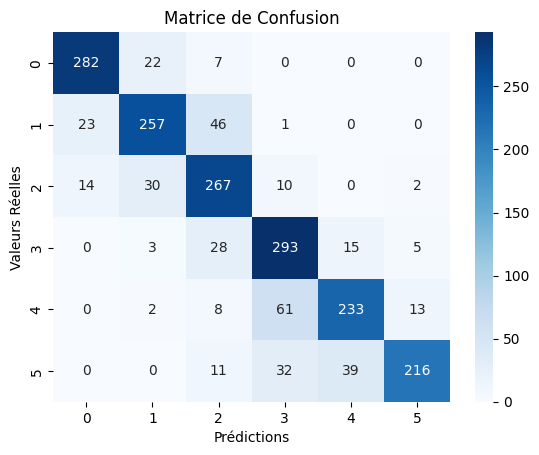

In [35]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assurez-vous que 'y_test' est la série contenant les étiquettes réelles
# et que 'predicted_difficulties' contient les prédictions correspondantes

# Convertir les étiquettes réelles et les prédictions dans le format approprié si nécessaire
# Par exemple, si vos étiquettes sont sous forme de texte (comme 'A1', 'B2', etc.), convertissez-les en numérique

# Création de la matrice de confusion
matrice_confusion = confusion_matrix(y_test, predicted_difficulties)

# Affichage de la matrice de confusion
sns.heatmap(matrice_confusion, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Prédictions')
plt.ylabel('Valeurs Réelles')
plt.title('Matrice de Confusion')
plt.show()
